# Background / Latar Belakang

Industri perangkat lunak sebagai layanan (SaaS) telah berkembang pesat dalam beberapa tahun terakhir, menjadi model pilihan bagi banyak perusahaan dalam menyediakan solusi perangkat lunak yang efisien dan mudah diakses. Berdasarkan data, penjualan SaaS kian meningkat walau sempat turun pada tahun 2021. Berdasarkan RankTracker, Pada tahun 2025, 80% perusahaan diproyeksikan telah beralih sepenuhnya ke SaaS. Dengan SaaS, pelanggan dapat mengakses aplikasi melalui internet tanpa perlu menginstal dan memelihara perangkat lunak secara lokal. Fleksibilitas, skalabilitas, dan biaya yang lebih rendah adalah beberapa keuntungan utama yang ditawarkan oleh model bisnis ini. 

Meskipun popularitas SaaS terus meningkat, persaingan di pasar SaaS juga semakin intensif. Untuk mencapai keberhasilan dalam industri ini, perusahaan SaaS perlu memahami pasar dengan baik dan memiliki strategi penjualan yang efektif. Oleh karena itu, menganalisis faktor-faktor yang mempengaruhi penjualan SaaS menjadi sangat penting.

# Problem Statement
Dalam mengoptimalkan penjualan perangkat lunak sebagai layanan (SaaS), pemahaman yang mendalam tentang faktor-faktor yang mempengaruhi kinerja penjualan sangat penting. Data SaaS sales yang ada menyediakan kesempatan untuk melakukan analisis yang mendalam untuk mengidentifikasi variabel-variabel kunci yang berpotensi memengaruhi penjualan SaaS. Tujuan akhirnya adalah untuk menentukan pasar mana yang perlu difokuskan dan faktor-faktor mana yang paling mempengaruhi penjualan.

# Goal / Tujuan

Dikarenakan problem statemnet yang ada, Goal dari analisis ini adalah dengan menjawab pertanyaan:
- Bagaimana cara meningkatkan Penjualan SaaS berdasarkan Variabel kunci, dan pasar mana yang perlu difokuskan? 

# Import Libraries

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Understanding

**Data Understanding** merupakan tahap **pengenalan dataset**. Dari tahap ini, kita dapat mengidentifikasi berbagai anomali yang ada dalam dataset kita yang perlu diperbaiki selama proses data cleaning. Setiap tindakan yang diambil untuk menangani anomali akan didukung oleh penjelasan yang memadai, baik berdasarkan pengetahuan domain maupun analisis statistik.

## Data Overall

In [191]:
# Melihat keseluruhan data
import pandas as pd
df = pd.read_csv('SaaS-Sales.csv')
display(df.head())
display(df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


Dataset ini berisi 9994 baris dan 19 kolom data transaksi dari perusahaan SaaS fiktif yang menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain (B2B). Dalam dataset ini, setiap baris mewakili sebuah produk dalam sebuah transaksi, dan kolom-kolomnya mencakup:

1. **Row ID**: Pengenal unik untuk setiap transaksi.
2. **Order ID**: Pengenal unik untuk setiap pesanan.
3. **Order Date**: Tanggal ketika pesanan ditempatkan.
4. **Date Key**: Representasi numerik dari tanggal pesanan (YYYYMMDD).
5. **Contact Name**: Nama orang yang melakukan pemesanan.
6. **Country**: Negara di mana pesanan ditempatkan.
7. **City**: Kota di mana pesanan ditempatkan.
8. **Region**:  Wilayah di mana pesanan ditempatkan.
9. **Subregion**: Subwilayah di mana pesanan ditempatkan.
10. **Customer**: Nama perusahaan yang melakukan pemesanan.
11. **Customer ID**: Pengenal unik untuk setiap pelanggan.
12. **Industry**:  Industri tempat pelanggan berasal.
13. **Segment**:  Segmen pelanggan (SMB, Strategis, Enterprise, dll.).
14. **Product**:  Produk yang dipesan.
15. **License**: Kunci lisensi untuk produk.
16. **Sales**: Jumlah penjualan total untuk transaksi.
17. **Quantity**: Jumlah total barang dalam transaksi.
18. **Discount**: Diskon yang diterapkan pada transaksi.
19. **Profit**: Keuntungan dari transaksi.

## Data Types

In [192]:
# Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

Terdapat 19 kolom data pada data transaksi ini. Dari semua variabel tersebut ada **satu variabel** yang tipe data nya masih **salah**, yaitu **Order Date** yang seharusnya berupa **datetime year**, namun masih berupa **object**.

## Missing Values

In [193]:
print (f'Total Missing Values \n{df.isna().sum().sort_values(ascending = False)}')

Total Missing Values 
Row ID          0
Customer ID     0
Discount        0
Quantity        0
Sales           0
License         0
Product         0
Segment         0
Industry        0
Customer        0
Order ID        0
Subregion       0
Region          0
City            0
Country         0
Contact Name    0
Date Key        0
Order Date      0
Profit          0
dtype: int64


**Tidak terdapat missing values** pada satu barispun di data.

<Axes: >

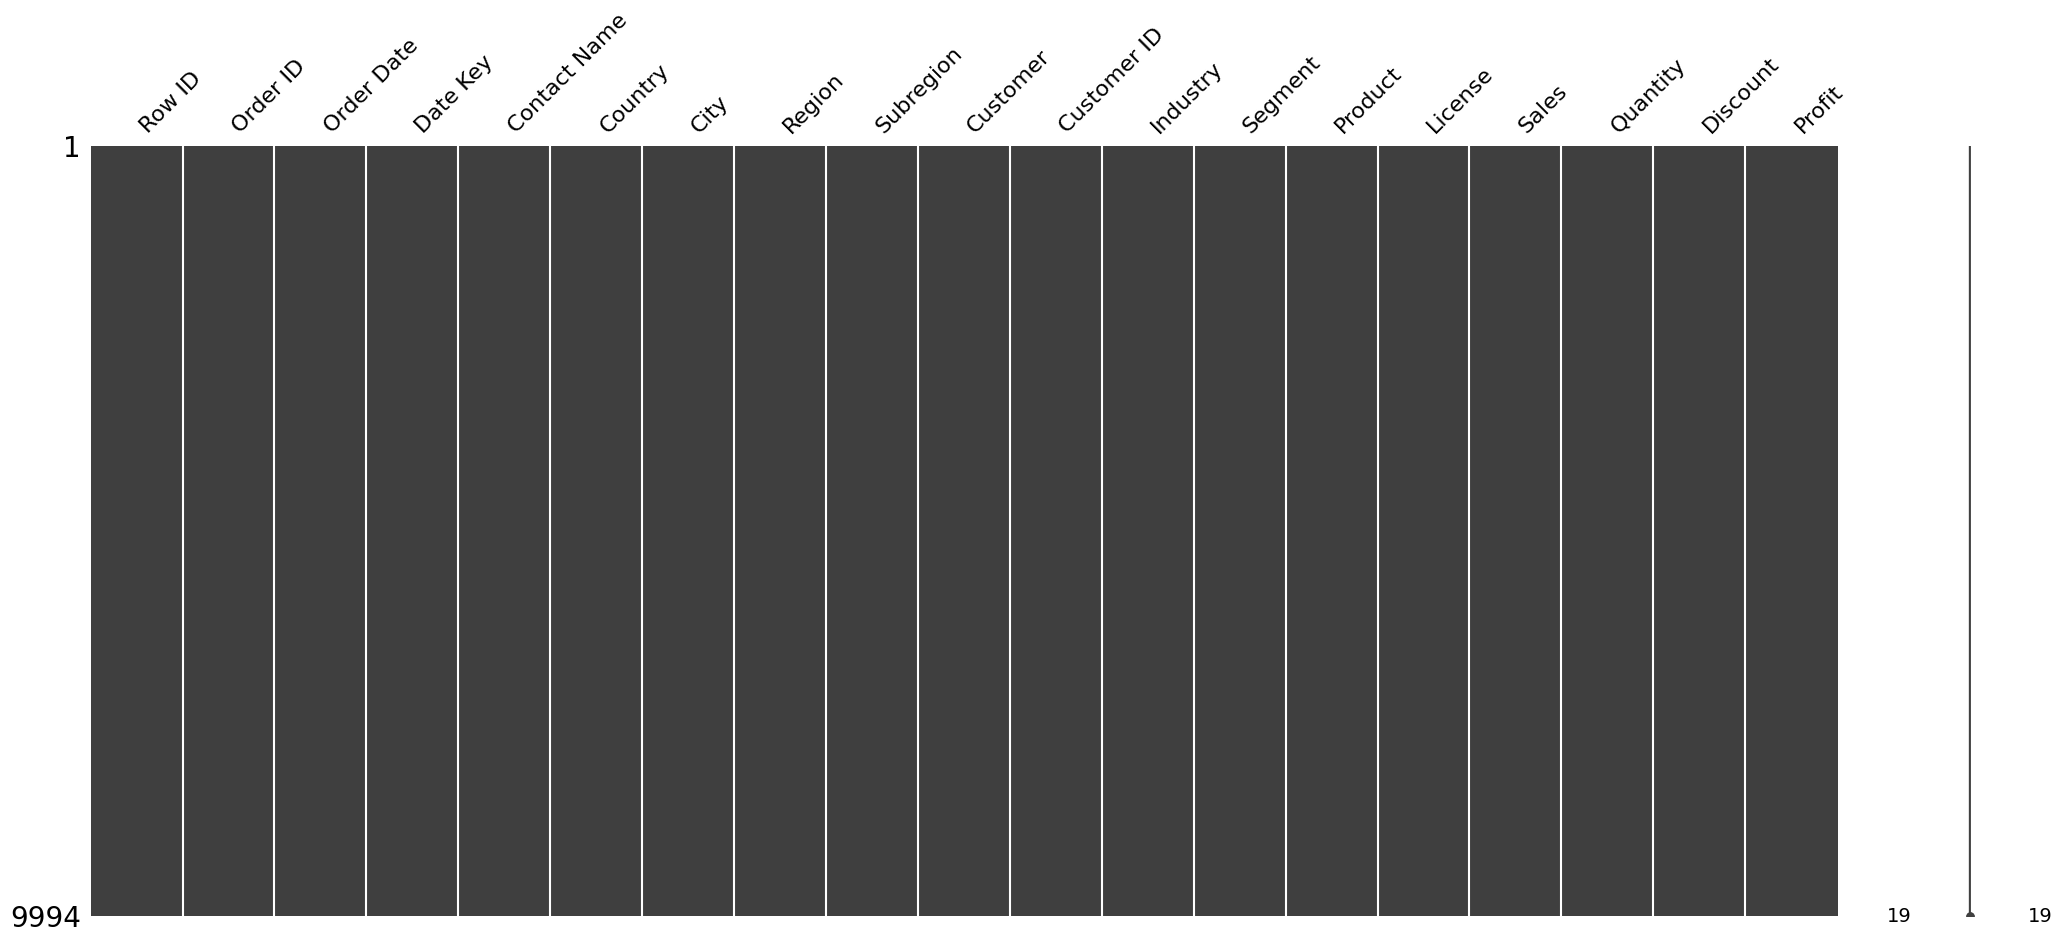

In [194]:
import missingno
missingno.matrix(df)

**Tidak terdapat missing values** pada satu barispun di data.

## Data Unique

In [195]:
pd.set_option('display.max_colwidth',1000)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, A..."
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 20201226, 20200920, 20231106, 20221107, 20230203, 20221014, 20220906, 20230919, 20231223, 20210907, 20201022, 20220314, 20210531, 20210528, 20200301, 20221121, 20220512, 20211228, 20221117, 20221108, 20200908, 20200805, 20200914, 20230422, 20211121, 20211215, 20201119, 20221129, 20200826, 20220717, 20211012, 20211031, 20200321, 20230707, 20230625, 20200803, 20231218, 20230604, 20231202, 20210209, 20210102, 20221..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Morrison, Claire Welch, Carol Campbell, Blake Hughes, Melanie Sharp, Luke Bower, Jonathan Ferguson, Sam Parsons, Neil Gill, Amelia Campbell, Chloe Short, Jasmine Metcalfe, Karen Mathis, Dylan Dickens, Sophie Lewis, Gavin Mitchell, Katherine Dowd, Harry Brown, Brian Dickens, Joseph Newman, Nicola Howard, Stewart Wilson, Eric McLean, Leah Clarkson, Alison Davidson, Sophie

Dari unique sample data diatas, dapat diambil informasi bahwa:
- kolom Row ID berisikan id unik untuk tiap baris. Hal tersebut tidak relevan dalam analisis dan dapat dihapus.
- kolom Date Key Date merupakan representasi numerik dari order date. Hal tersebut tidak relevan dalam analisis dan dapat dihapus. 
- Tidak ada kesalahan penulisan data. Terlihat dari kemiripan penulisan data. (sebagai contoh, koma pada profit konsisten menggunakan titik ( . ) )

## Numerik

In [196]:
numerik = df.select_dtypes(include='number')

### Statistika Deskriptif

In [197]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


Dari data diatas, dapat dilihat bahwa: 
- Data SaaS Sales memiliki 9994 Baris Data
- kolom Row ID berisikan id unik untuk tiap baris. Hal tersebut tidak relevan dalam analisis dan dapat dihapus.
- kolom Date Key merupakan representasi numerik dari order date. Hal tersebut tidak relevan dalam analisis dan dapat dihapus. 
- Jika dilihat dari Mean dan Mediannya (50%), mean sales > median sales,maka kemungkinan lebih besar distribusi memiliki ekor yang panjang di sisi kanan (right skewed). Lalu, mean profit > median profit, maka kemungkinannya sama, yaitu lebih besar distribusi memiliki ekor yang panjang di sisi kanan (right skewed).
- Data sales dan profit termasuk kedalam data kontinu, sedangkan quantity dan discount masuk ke dalam data diskrit.

### Distribusi Data

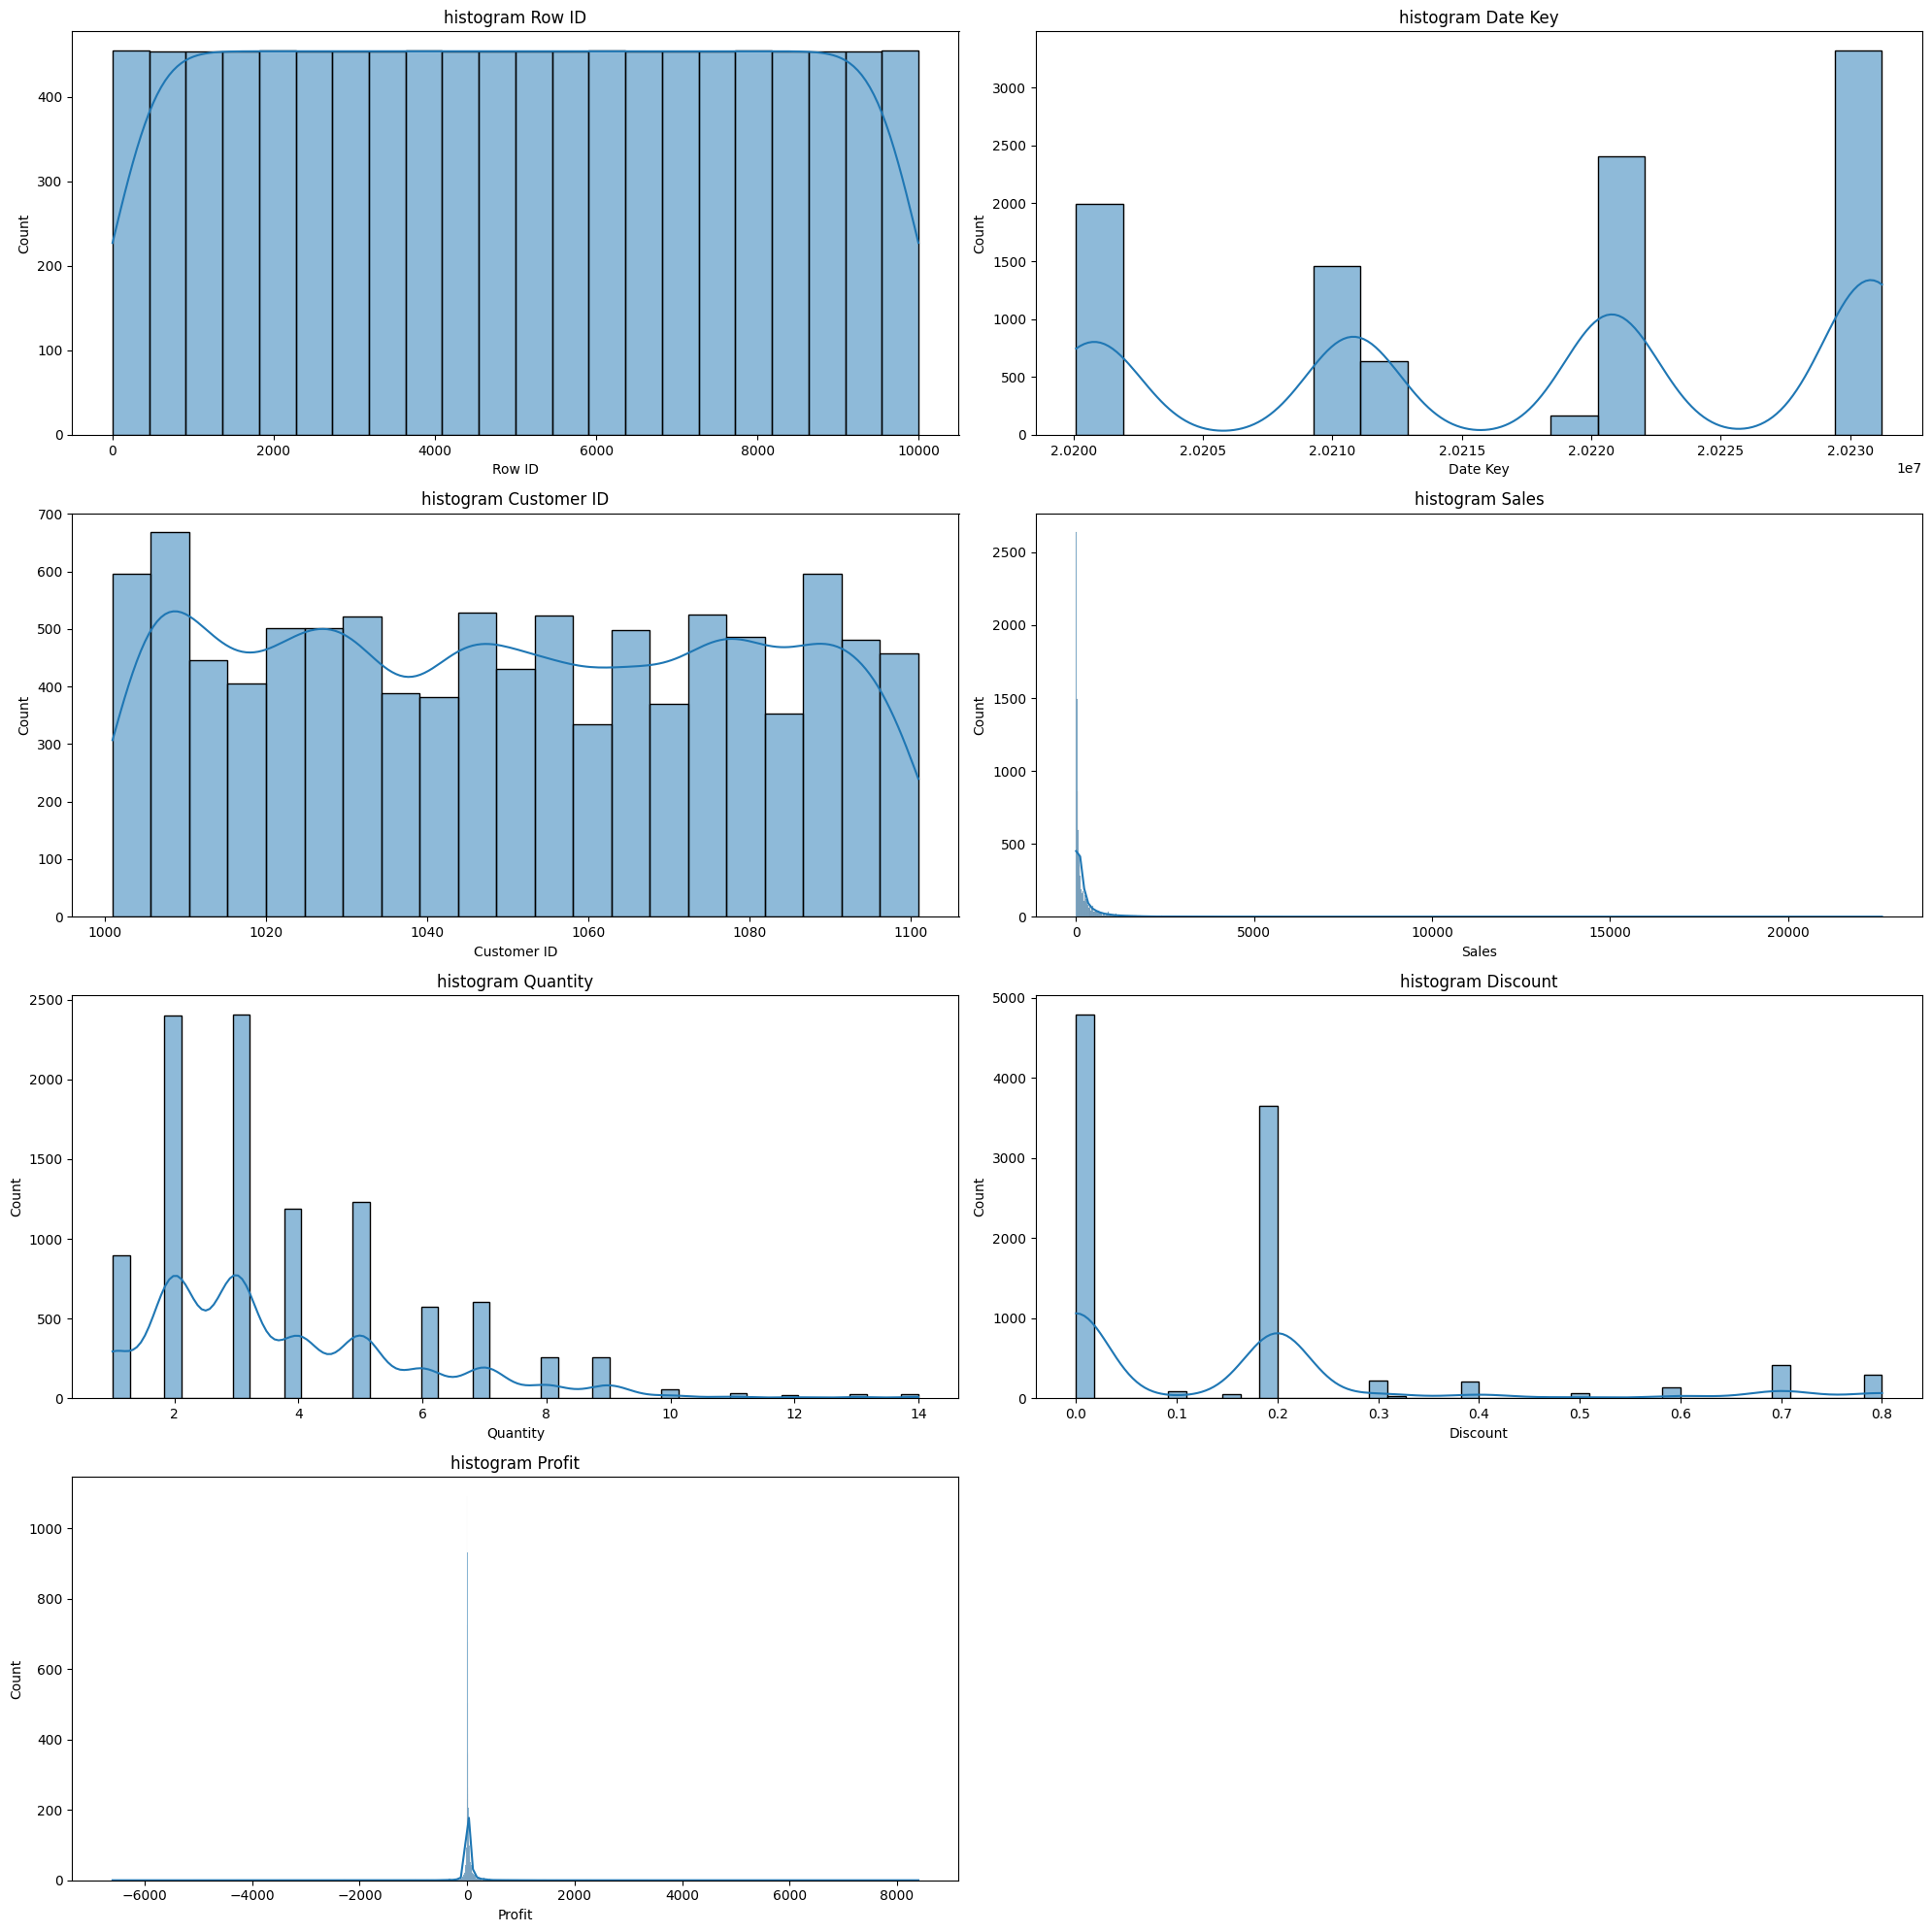

In [198]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(4,2,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"histogram {kolom}")
    fig.tight_layout() # biar tidak tertumpuk
plt.show()

Dari diagram diatas, dapat diambil informasi bahwa:
- Data Histogram sales memiliki distribusi tidak normal, sedangkan profit belum terlihat jelas. Keduanya dapat di lakukan penelitian lebih dalam setelah ini
- Quantity paling banyak berada pada angka 2 & 3
- Penjualan dengan dicount 0% dan 20% paling banyak dibeli oleh customer
- Row ID hanya berisikan data unik setiap kolomnya, maka tidak relevan untuk dilihat visualisasi datanya dan dapat di drop pada data cleaning
- Date key hanya berisikan data representasi numerik dari order date setiap kolomnya, maka tidak relevan untuk dilihat visualisasi datanya dan dapat di drop pada data cleaning

### Outliers

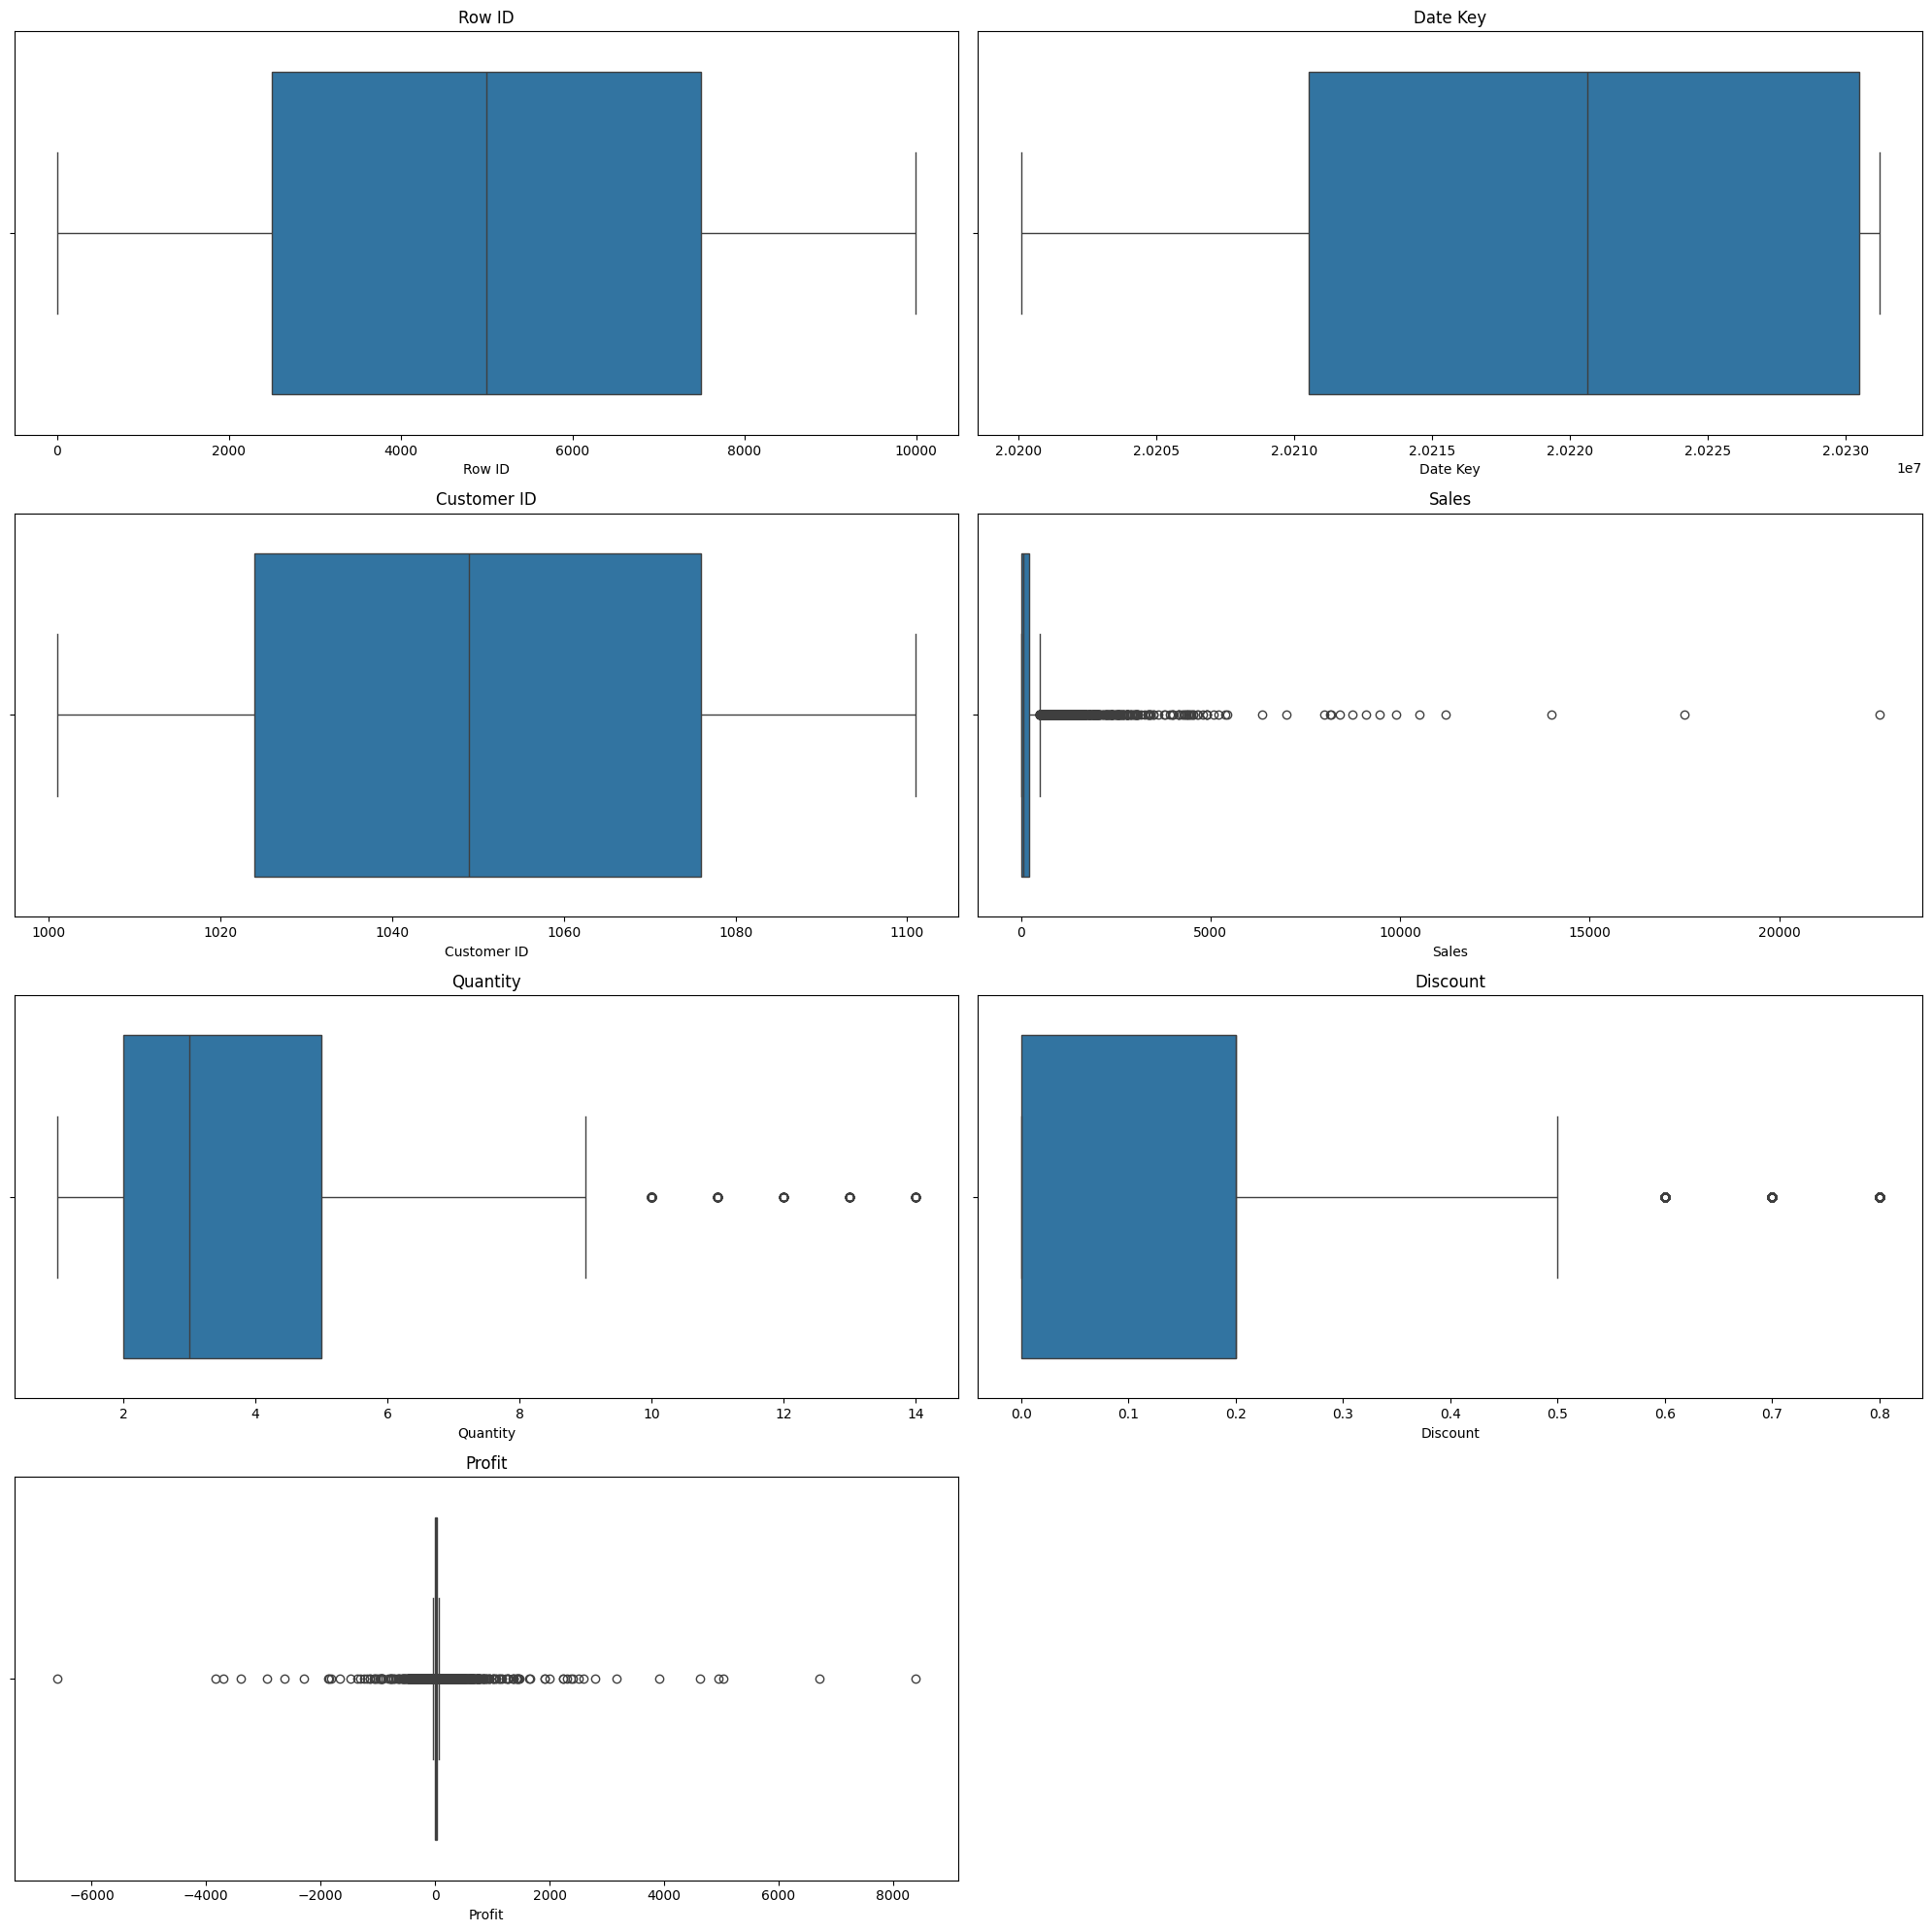

In [199]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(4,2,count)
    sns.boxplot(numerik, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

In [200]:
for kolom in numerik.columns:
    q1 = df[kolom].describe().loc['25%']
    q3 = df[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
    print(f"data {kolom} memiliki outliers {jumlah_outliers}")

data Row ID memiliki outliers 0
data Date Key memiliki outliers 0
data Customer ID memiliki outliers 0
data Sales memiliki outliers 1167
data Quantity memiliki outliers 170
data Discount memiliki outliers 856
data Profit memiliki outliers 1881


Dari data diatas, didapatkan informasi sebagai berikut:
- Kolom sales, quantity, discount, dan profit memiliki outliers, dengan outliers terbanyak dimiliki oleh profit sebanyak 1881 dan terkecil pada quantity dengan data sebanyak 170.
- Kolom Discount memiliki 856 outliers
- Kolom Sales memiliki 1167 Outliers
- Kolom Row ID, Date Key, dan Customer ID tidak memiliki Outliers.

### Korelasi

In [201]:
numerik.corr(method='spearman') # ketika tidak normal, kalau normal = pearson

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.010674,0.029053,-0.001310,-0.002416,0.012655,-0.010545
Date Key,0.010674,1.000000,0.003256,-0.001735,-0.000168,-0.004123,0.001305
Customer ID,0.029053,0.003256,1.000000,0.004174,-0.000905,0.011466,-0.011133
Sales,-0.001310,-0.001735,0.004174,1.000000,0.327426,-0.056969,0.518407
Quantity,-0.002416,-0.000168,-0.000905,0.327426,1.000000,-0.000878,0.234491
Discount,0.012655,-0.004123,0.011466,-0.056969,-0.000878,1.000000,-0.543350
Profit,-0.010545,0.001305,-0.011133,0.518407,0.234491,-0.543350,1.000000


<Axes: >

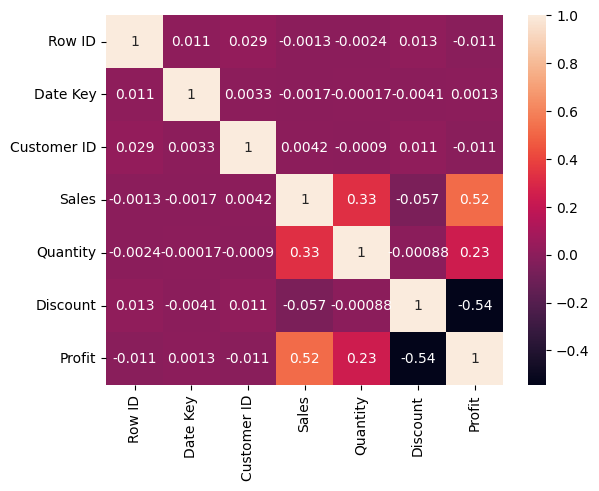

In [202]:
sns.heatmap(numerik.corr(method='spearman'), annot=True)

Dari visualisasi di samping, didapatkan informasi sebagai berikut:
- Korelasi dengan hubungan positif tertinggi dimiliki oleh profit dan sales dengan nilai 0.52
- Korelasi dengan hubungan positif tertinggi kedua dimiliki oleh sales dan quantity dengan nilai 0.33
- Kedua hal diatas menunjukkan bahwa semakin tinggi salah satunya, maka akan berdampak positif (naik) pula terhadap satu data lainnya
- Discount dan profit memiliki hubungan negatif dengan nilai -0.54, hal ini menunjukkan semakin besar discount akan semakin kecil profit yang didapatkan.


## Kategorik

In [203]:
kategorik = df.select_dtypes(exclude='number')

In [204]:
kategorik

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,16GRM07R1K
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,QLIW57KZUV
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,JI6BVL70HQ
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,DE9GJKGD44
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,1/22/2020,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD
9990,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L
9991,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Site Analytics,I5SVMI6M88
9992,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,Finance,SMB,Support,JHLW4P6LQ2


### Count Values

In [205]:
kategorik.nunique()

Order ID        5009
Order Date      1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Industry          10
Segment            3
Product           14
License         9994
dtype: int64

- Data memiliki 5009 Order ID unik
- Data memiliki 99 Customer Unik
- Data memiliki 14 Product Unik
- Data memiliki 10 Industry dan 3 Segment.


### Modus 

In [206]:
kategorik.describe(include='object')

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


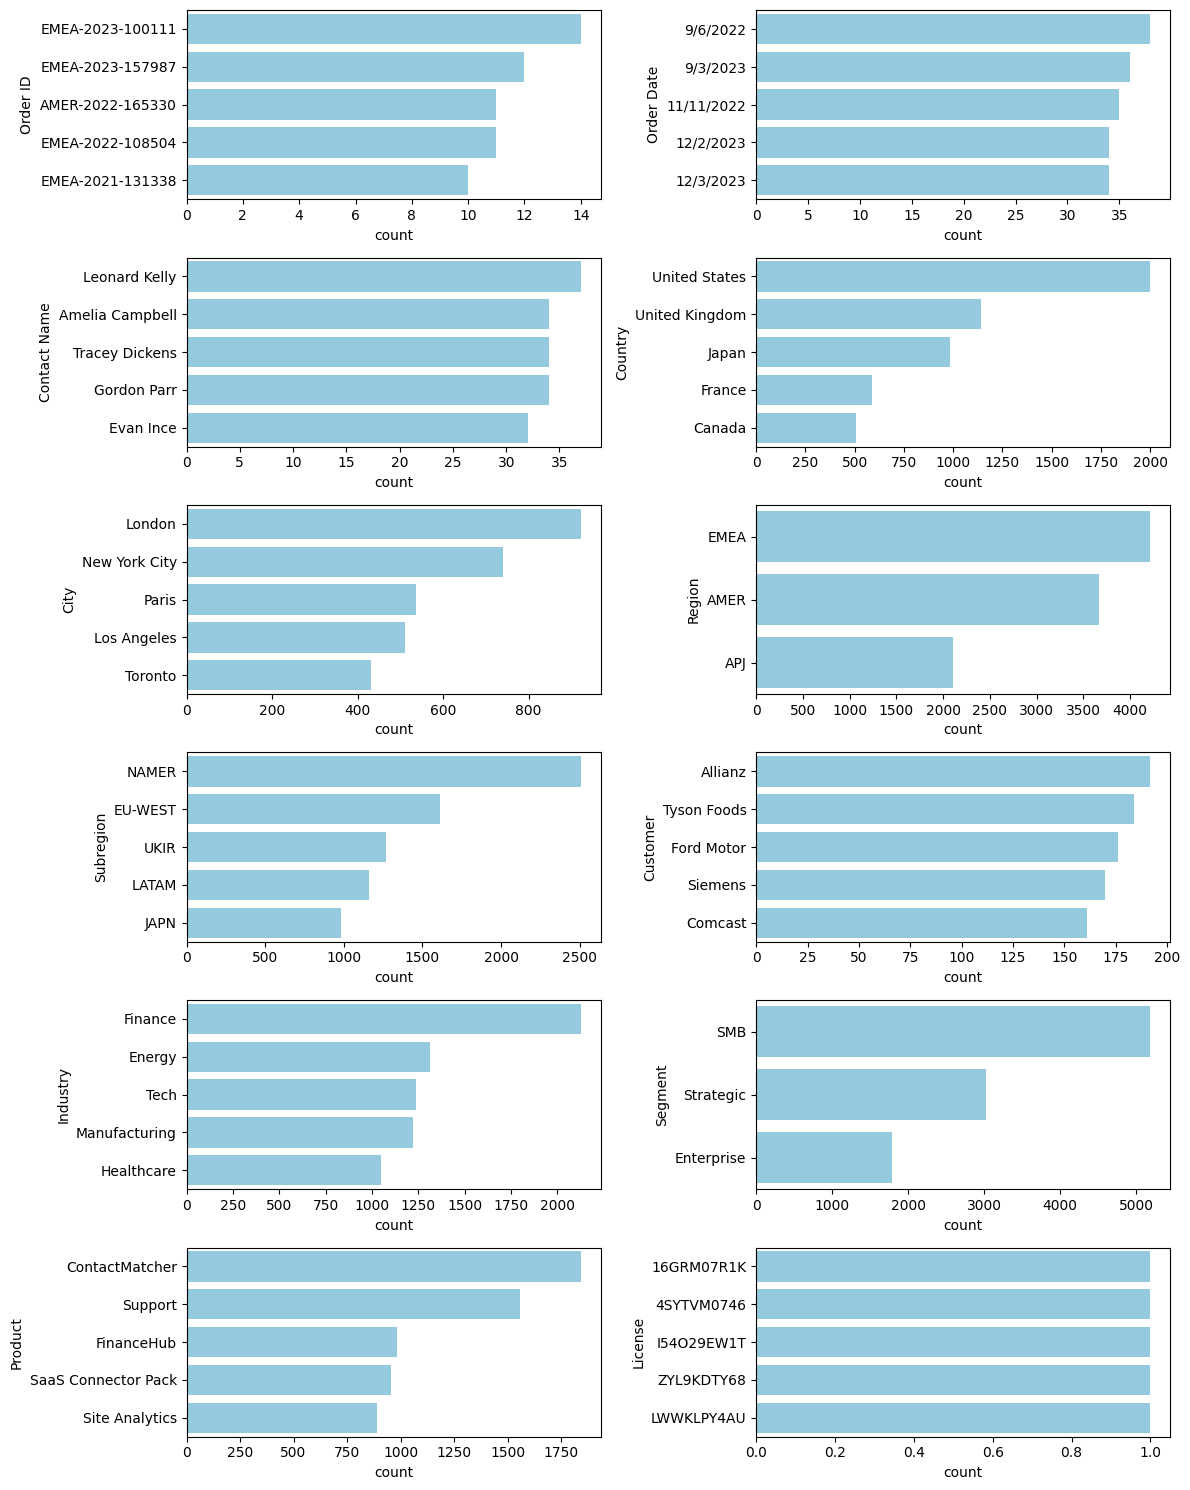

In [207]:
count = 0
fig = plt.figure(figsize=(12,15))
for kolom in kategorik.columns:
    count += 1
    plt.subplot(6,2,count)
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(5).index, color= 'skyblue')
    fig.tight_layout()
plt.show()

Berdasarkan hasil visualisasi diatas adalah:
- EMEA-2023-100111 merupakan Order ID yang paling banyak muncul.
- Tanggal 9/6/2022 merupakan tanggal paling banyak menghasilkan pesanan.
- Leonard Kelly merupakan contact person dengan pesanan terbanyak
- Amerika Serikat Merupakan negara paling banyak memesan.
- London merupakan kota paling banyak memesan. 
- EMEA (Europe, the Middle East and Africa) merupakan Region paling banyak memesan.
- NAMER merupakan SubRegion paling banyak memesan
- Allianz merupakan customer paling sering memesan.
- Industri Finance paling banyak memesan.
- SMB merupakan segemn paling banyak memesan.
- Produk contactMatcher paling banyak dipesan
- License tidak memiliki modus dikarenakan license ini merupakan data unik untuk setiap rownya.

# Data Cleaning

In [208]:
df_prep = df.copy() # ini penting agar tidak terlalu jauh kalau ingin mengulang cleaning

Melakukan pengcopyan data agar mempermudah pada saat melakukan data cleaning.

## Drop Kolom

In [209]:
df_prep.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [210]:
df_prep = df_prep.drop(['Row ID', 'Date Key'], axis = 1)
df_prep

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,1/22/2020,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2/27/2023,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


Melakukan penghapusan kolom Row ID dan Date Key, kolom Row ID berisikan id unik untuk tiap baris. Hal tersebut tidak relevan dalam analisis dan dapat dihapus.
Lalu, kolom Date Key Date merupakan representasi numerik dari order date. Hal tersebut juga tidak relevan dalam analisis dan dapat dihapus. 

## Penyesuaian Dtype

In [211]:
# Melihat tipe data
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Contact Name  9994 non-null   object 
 3   Country       9994 non-null   object 
 4   City          9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Subregion     9994 non-null   object 
 7   Customer      9994 non-null   object 
 8   Customer ID   9994 non-null   int64  
 9   Industry      9994 non-null   object 
 10  Segment       9994 non-null   object 
 11  Product       9994 non-null   object 
 12  License       9994 non-null   object 
 13  Sales         9994 non-null   float64
 14  Quantity      9994 non-null   int64  
 15  Discount      9994 non-null   float64
 16  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(12)
memory usage: 1.3+ MB


Berdasarkan data diatas, order date masih terdata sebagai object, yang seharusnya merupakan datetime. maka perlu dilakukan pengubahan tipe data menjadi datetime

In [212]:
df_prep['Order Date'] = pd.to_datetime(df_prep['Order Date'])
df_prep

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [213]:
# Melihat tipe data
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   int64         
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

Dengan berhasilnya diubah Date Key menjadi data type date time, maka semua tipe data telah sesuai.

## Handling Missing Values

In [214]:
# cek data yang missing values

df_prep[df_prep.isna().any(axis = 1)] # menunjukkan semua data yang missing

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [215]:
df.isna().sum().sort_values(ascending = False)

Row ID          0
Customer ID     0
Discount        0
Quantity        0
Sales           0
License         0
Product         0
Segment         0
Industry        0
Customer        0
Order ID        0
Subregion       0
Region          0
City            0
Country         0
Contact Name    0
Date Key        0
Order Date      0
Profit          0
dtype: int64

<Axes: >

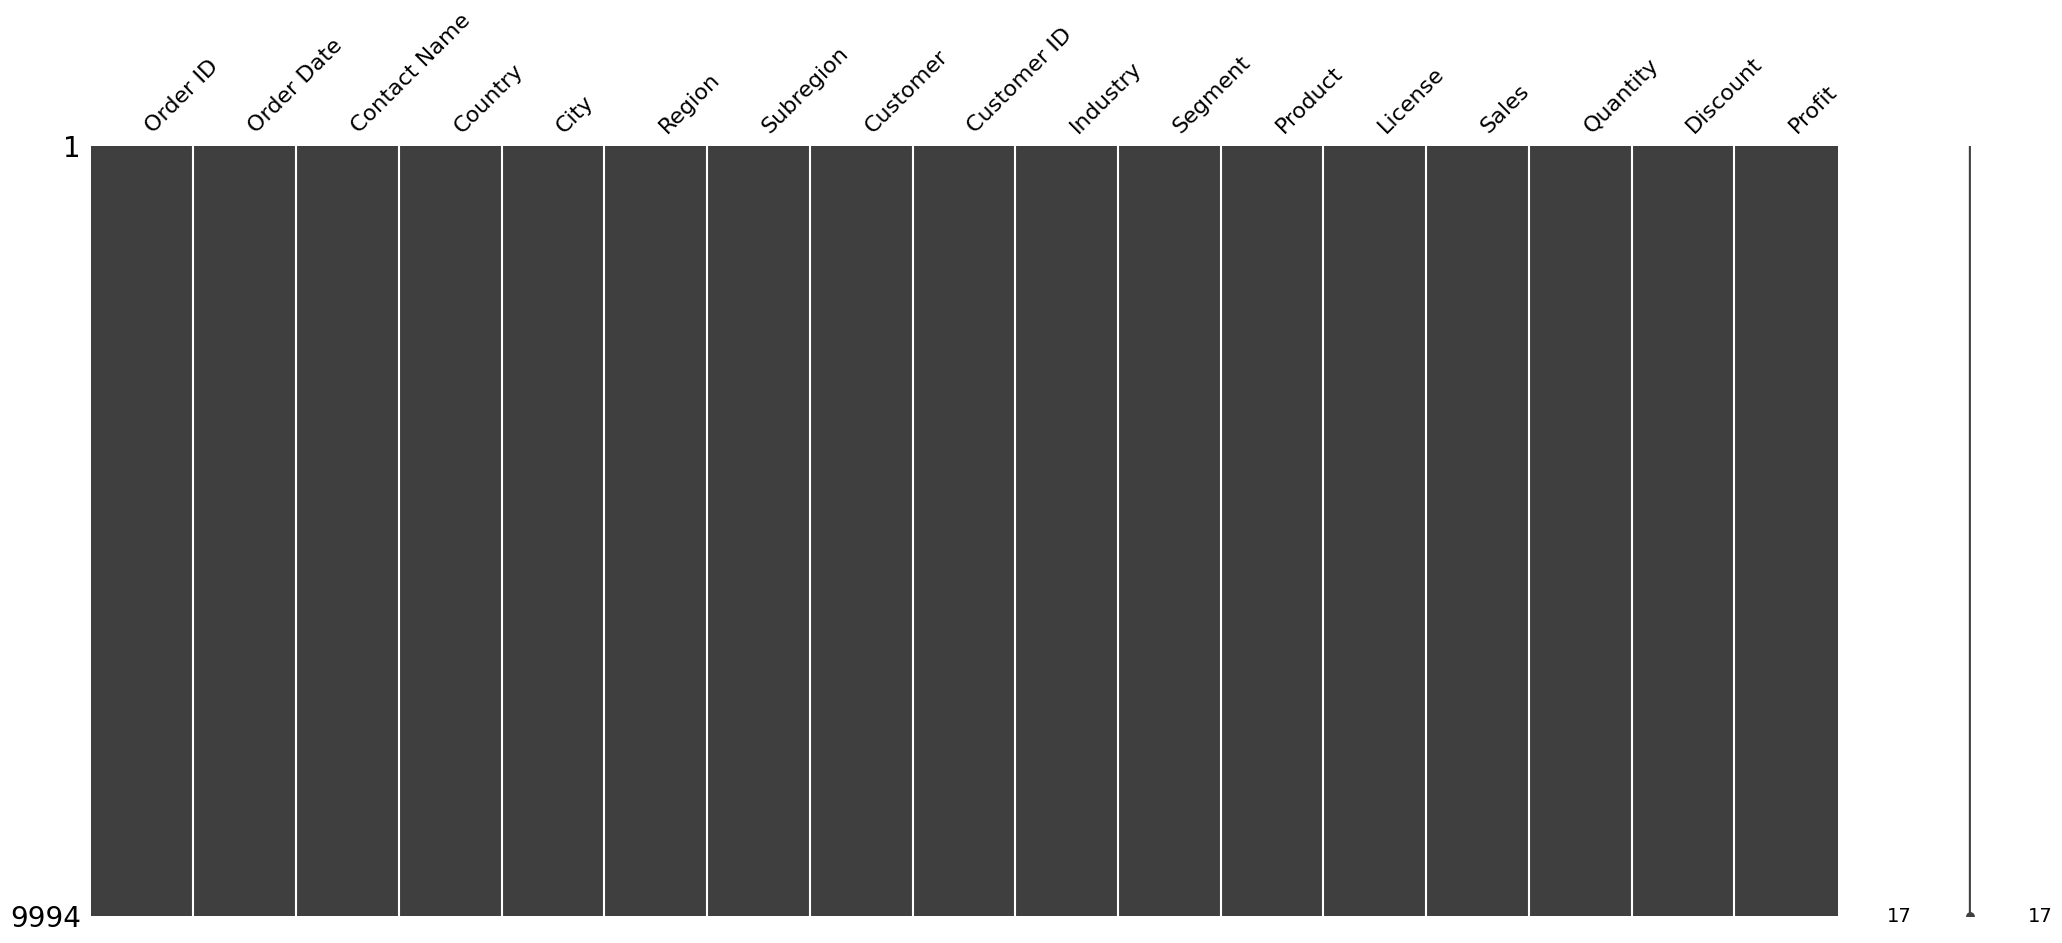

In [216]:
import missingno
missingno.matrix(df_prep)

Pada data SaaS sales, tidak ada data missing satupun.

## Handling untuk outliers

In [217]:
numerik2 = df_prep.select_dtypes(include='number')

In [218]:
print('Berikut merupakan Jumlah Data Outliers: \n')
for kolom in numerik2.columns:
    q1 = df[kolom].describe().loc['25%']
    q3 = df[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
    print(f"data {kolom} memiliki outliers {jumlah_outliers}")

Berikut merupakan Jumlah Data Outliers: 

data Customer ID memiliki outliers 0
data Sales memiliki outliers 1167
data Quantity memiliki outliers 170
data Discount memiliki outliers 856
data Profit memiliki outliers 1881


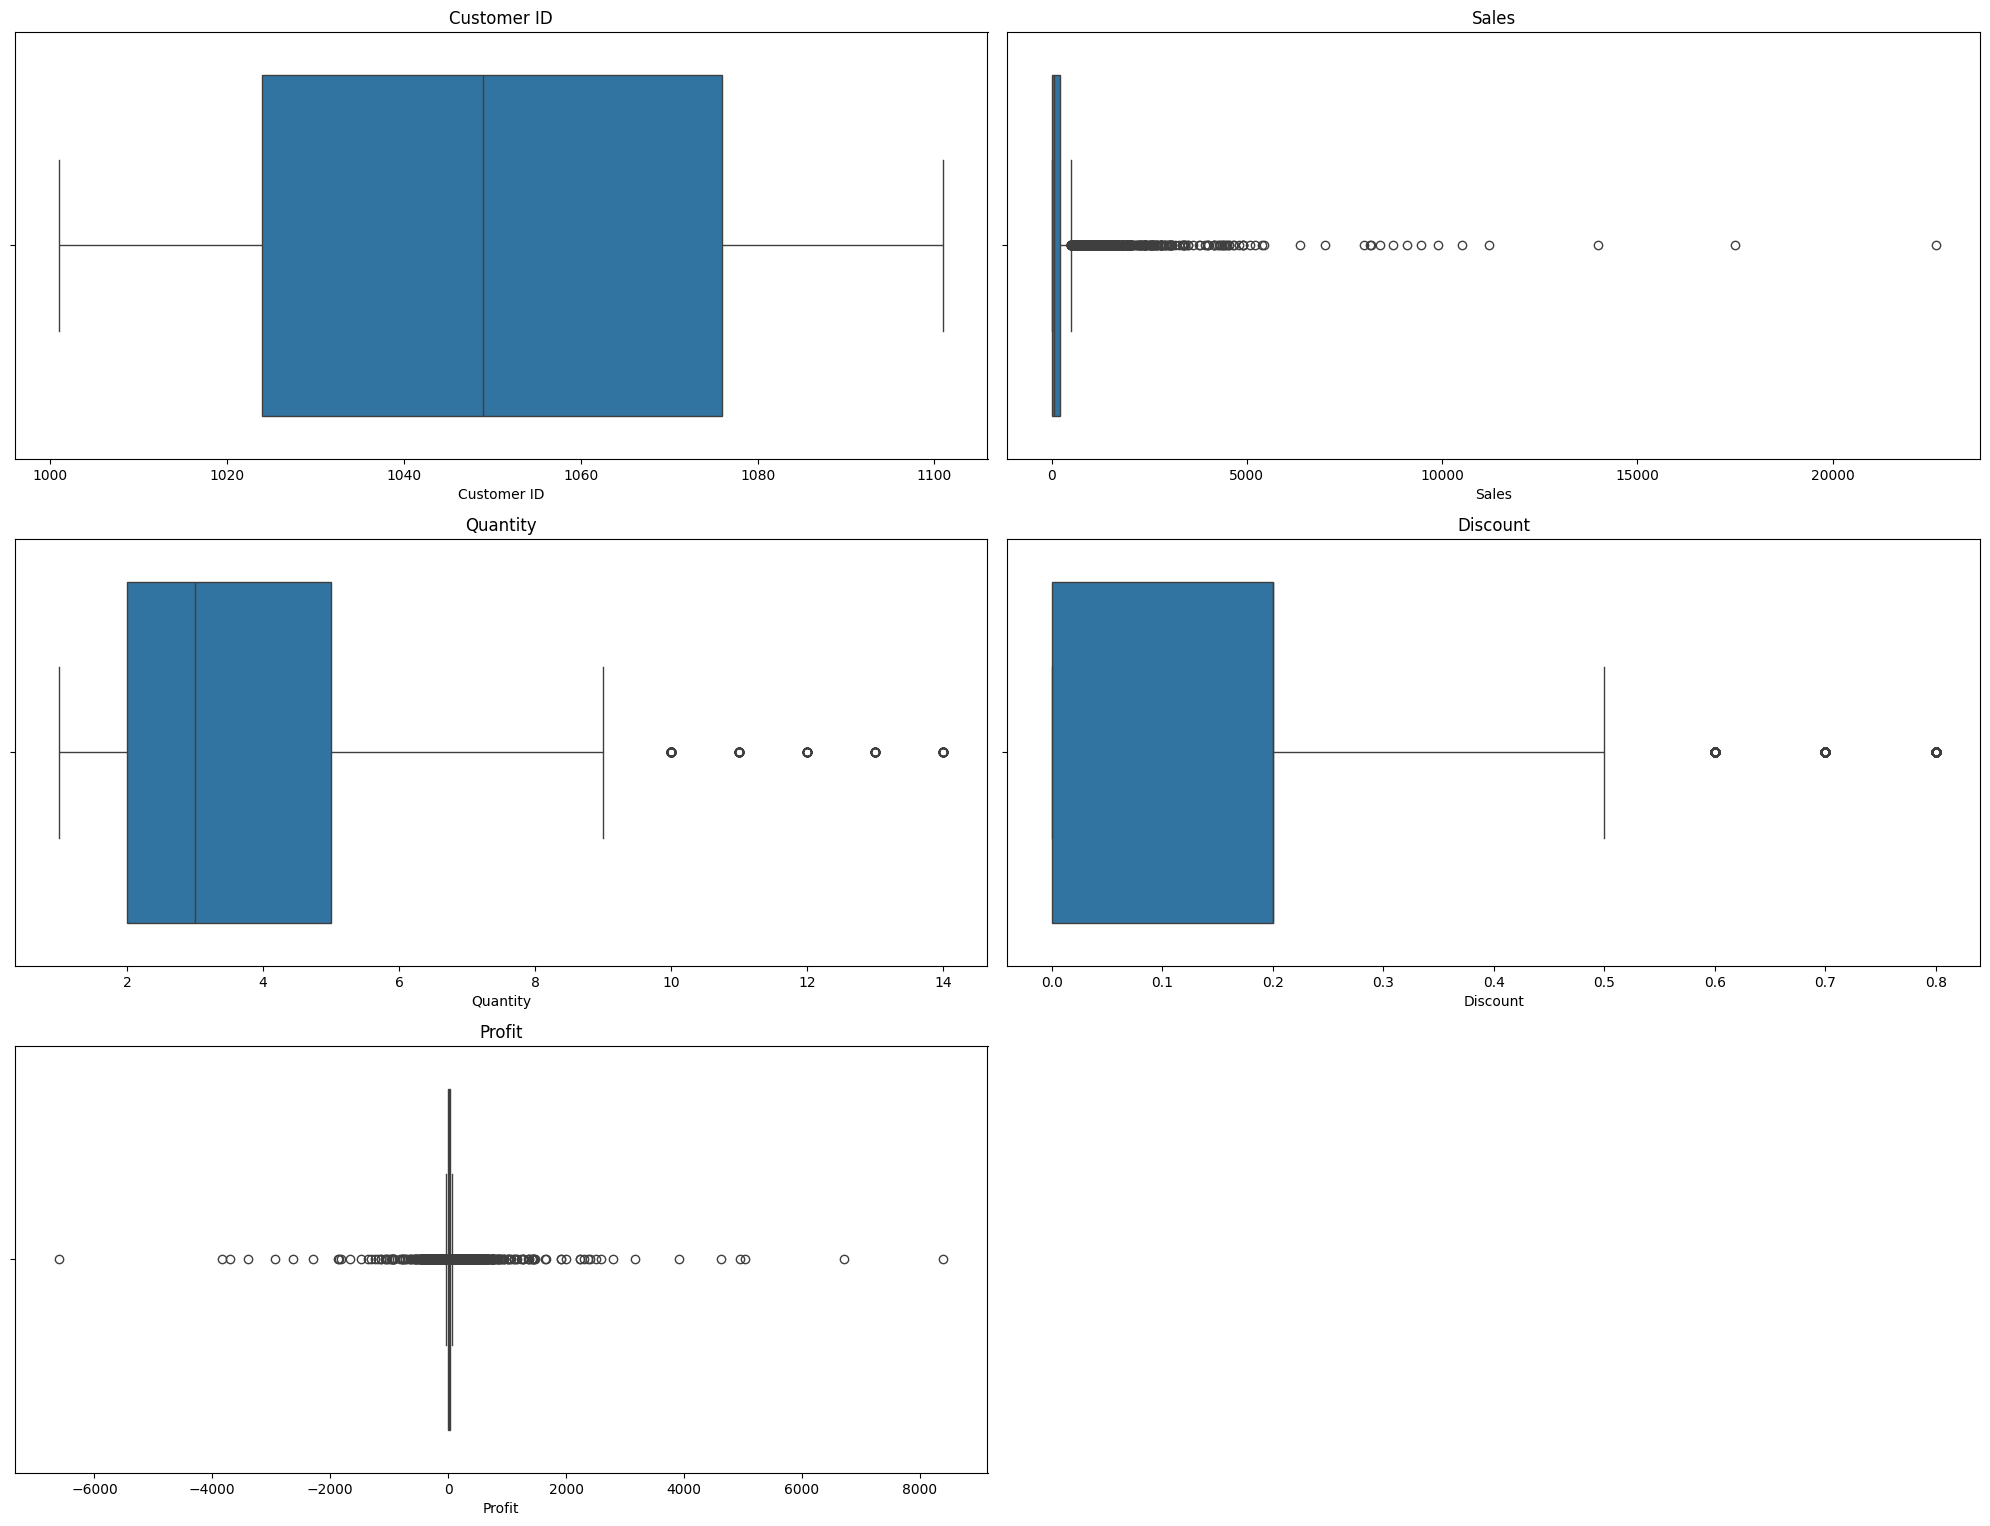

In [219]:
fig = plt.figure(figsize=(20,20)) # horizontal, vertikal

count = 0
for kolom in numerik2.columns:
    count += 1
    plt.subplot(4,2,count)
    sns.boxplot(numerik2, x = kolom)
    fig.tight_layout() # biar tidak tertumpuk
    plt.title(f'{kolom}')
plt.show()

In [220]:
numerik[['Sales','Quantity','Discount','Profit']].mean()

Sales       229.858001
Quantity      3.789574
Discount      0.156203
Profit       28.656896
dtype: float64

In [221]:
df[df['Quantity'] > 9][['Sales','Quantity','Discount','Profit']].sort_values(by=['Quantity', 'Profit'], ascending=False).head(5)

,Sales,Quantity,Discount,Profit
1711,1702.120,14,0.0,510.6360
7387,1336.440,14,0.0,387.5676
8935,1119.888,14,0.2,209.9790
1429,427.420,14,0.0,196.6132
1433,1819.860,14,0.0,163.7874


In [222]:
df[df['Discount'] > 0.5][['Sales','Quantity','Discount','Profit']].sort_values(by=['Discount', 'Profit'], ascending=[False,True]).head(5)

,Sales,Quantity,Discount,Profit
9774,2177.584,8,0.8,-3701.8928
4991,1889.990,5,0.8,-2929.4845
5310,1525.188,6,0.8,-2287.7820
1199,1088.792,4,0.8,-1850.9464
3324,896.990,5,0.8,-1480.0335


Dari data diatas, didapatkan informasi sebagai berikut:
- Kolom sales, quantity, discount, dan profit memiliki outliers, dengan outliers terbanyak dimiliki oleh profit sebanyak 1881 dan terkecil pada quantity dengan data sebanyak 170.
- penghapusan outliers tidak dilakukan, dikarenakan jika dilihat dari data, tidak ada anomali dalam penulisan data tersebut.
- Dapat dilihat, sebagai contoh, bahwa pada quantity yang memiliki nilai outlier (diatas 9 (dilihat dari grafik)), bahwa profit dan sales juga meningkat secara drastis sehingga menjadikan data tersebut sebagai data outlier juga. Lalu, pada saat discount yang memiliki nilai outlier (diatas 0.5 (dilihat dari grafik)), bahwa profit menurun secara drastis dan sales meningkat juga menjadikan data tersebut sebagai data outlier.
- Dilihat dari penjelasan diatas, ada kejelasan mengapa hal tersebut terjadi, sehingga hal tersebut terjadi secara logis, bukan karena hal yang anomali

### Handling duplicate

In [223]:
# Mengecek apakah ada duplikat dalam DataFrame
if df.duplicated().any():
    print("DataFrame memiliki duplikat.")
else:
    print("DataFrame tidak memiliki duplikat.")

DataFrame tidak memiliki duplikat.


Karena datafram tidak memiliki duplikat, berarti tidak ada yang perlu dilakukan di tahap ini

## Clean Data

In [224]:
df_prep

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


Data bersih ini ini berisi 9994 baris dan 17 kolom data transaksi dari perusahaan SaaS fiktif yang menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain (B2B). Dalam dataset ini, setiap baris mewakili sebuah produk dalam sebuah transaksi, dan kolom-kolomnya mencakup:

1. **Order ID**: Pengenal unik untuk setiap pesanan.
2. **Order Date**: Tanggal ketika pesanan ditempatkan.
3. **Contact Name**: Nama orang yang melakukan pemesanan.
4. **Country**: Negara di mana pesanan ditempatkan.
5. **City**: Kota di mana pesanan ditempatkan.
6. **Region**:  Wilayah di mana pesanan ditempatkan.
7. **Subregion**: Subwilayah di mana pesanan ditempatkan.
8. **Customer**: Nama perusahaan yang melakukan pemesanan.
9. **Customer ID**: Pengenal unik untuk setiap pelanggan.
10. **Industry**:  Industri tempat pelanggan berasal.
11. **Segment**:  Segmen pelanggan (SMB, Strategis, Enterprise, dll.).
12. **Product**:  Produk yang dipesan.
13. **License**: Kunci lisensi untuk produk.
14. **Sales**: Jumlah penjualan total untuk transaksi.
15. **Quantity**: Jumlah total barang dalam transaksi.
16. **Discount**: Diskon yang diterapkan pada transaksi.
17. **Profit**: Keuntungan dari transaksi.

# EDA (Exploratory Data Analysis)

Setelah dilakukan data cleaning, kita bisa lanjut ke tahap data analisis. Seperti yang pernah dikatakan oleh Paul Marsden, seorang businessman dan penulis asal inggris, “Business is all about solving people’s problems — at a profit.”. Maka dari itu, kita akan melihat apa yang customer butuhkan, segemntasinya, dan pengaruh terbesarnya kepada profit perusahaan. 

Dari heatmap yang sudah dijalankan, profit memiliki korelasi positif dengan sales dan quantity, sedangkan memiliki korelasi negatif dengan discount. Itu merupakan salah satu sumber informasi yang penting untuk data analisis selanjutnya.

Sebelum menganalisa dari faktor eksternal, mari mulai menganalisa dari faktor internal. Tahap analisa ini dimulai dengan melihat profit/quantity/sales pertahun, dan profit/quantit/sales berdasarkan produk dan discount yang akan diterapkan pada penjualan. Hal ini untuk memahami lebih dalam bagaimana penjualan produk dan penerapan strategi discount terjadi di pasar.

## Profit/Quantity/Sales per Tahun

Masuk ke tahap analisis data, dimulai dengan melihat Profit/Quantity/Sales per tahun

### Profit

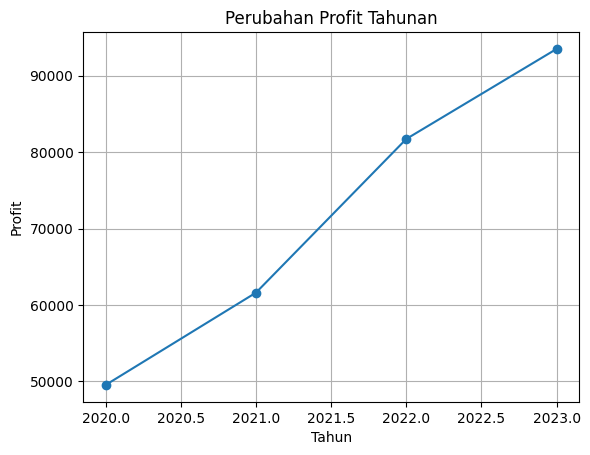

In [226]:
# Ubah kolom Tanggal menjadi tipe datetime
df_prep['Tanggal'] = pd.to_datetime(df_prep['Order Date'])

# Ekstrak tahun dari kolom Order Date
df_prep['Tahun'] = df_prep['Order Date'].dt.year

# Konversi tahun menjadi integer
df_prep['Tahun'] = df_prep['Tahun'].astype(int)

# Agregasi data berdasarkan tahun dan hitung total profit per tahun
profit_tahunan = df_prep.groupby('Tahun')['Profit'].sum().reset_index()

# Membuat plot
plt.plot(profit_tahunan['Tahun'], profit_tahunan['Profit'], marker='o', linestyle='-')

# Menambahkan judul dan label sumbu
plt.title('Perubahan Profit Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Profit')

# Menampilkan plot
plt.grid(True)
plt.show()

Dapat dilihat dari visualisasi, bahwa kenaikan profit SaaS sales terjadi dari tahun ke tahun, hal ini disebabkan oleh perkembangan Teknologi: Perkembangan teknologi seperti AI (Artificial Intelligence), analitik lanjutan, dan integrasi dengan teknologi baru seperti Internet of Things (IoT) dapat memberikan nilai tambah kepada solusi SaaS. Penyedia yang mampu memanfaatkan teknologi baru dengan baik bisa menjadi unggul dalam pasar yang semakin kompetitif.

### Sales

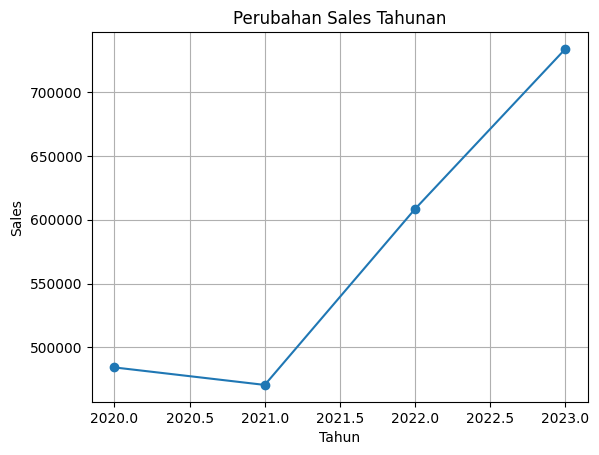

In [227]:
# Agregasi data berdasarkan tahun dan hitung total Sales per tahun
Sales_tahunan = df_prep.groupby('Tahun')['Sales'].sum().reset_index()

# Membuat plot
plt.plot(Sales_tahunan['Tahun'], Sales_tahunan['Sales'], marker='o', linestyle='-')

# Menambahkan judul dan label sumbu
plt.title('Perubahan Sales Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Sales')

# Menampilkan plot
plt.grid(True)
plt.show()

Jika dilihat dari data diatas, sales sempat menurun dari tahun 2020 ke 2021, namun setelah itu melesat naik kembali di tahun 2022 dan 2023, hal ini dapat dipengaruhi oleh berbagai faktor, termasuk perubahan dalam strategi bisnis, kondisi pasar, dan faktor internal serta eksternal lainnya. Berikut penjelasan mengapa situasi seperti ini bisa terjadi:

- Kondisi Ekonomi: Penurunan penjualan pada tahun 2021 mungkin terjadi karena ketidakpastian ekonomi yang disebabkan oleh faktor eksternal pandemi COVID-19 yang mengakibatkan ketidakstabilan pasar.

- Peningkatan Kesadaran Pasar: Peningkatan kesadaran pasar tentang manfaat solusi SaaS atau perubahan dalam kebutuhan bisnis mempengaruhi kinerja penjualan. Ada peningkatan kesadaran di antara pelanggan tentang manfaat SaaS atau peningkatan kebutuhan untuk solusi cloud-based selama periode tersebut.

### Quantity

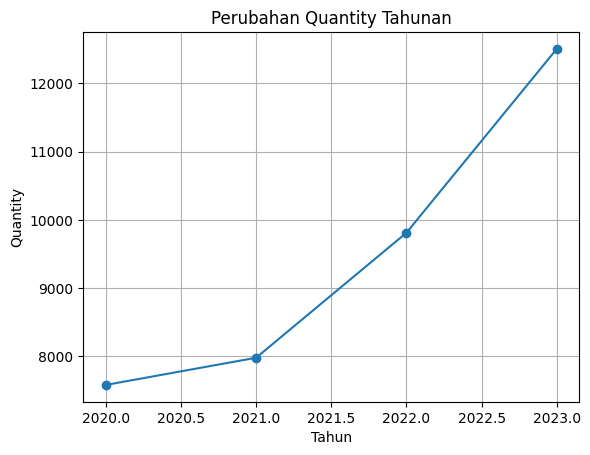

In [228]:
# Agregasi data berdasarkan tahun dan hitung total Quantity per tahun
Quantity_tahunan = df_prep.groupby('Tahun')['Quantity'].sum().reset_index()

# Membuat plot
plt.plot(Quantity_tahunan['Tahun'], Quantity_tahunan['Quantity'], marker='o', linestyle='-')

# Menambahkan judul dan label sumbu
plt.title('Perubahan Quantity Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Quantity')

# Menampilkan plot
plt.grid(True)
plt.show()

Jika dilihat dari profit dan Sales, profit selalu naik namun sales sempat menurun di tahun 2021. Namun, sama halnya seperti profit, quantity juga mengalami kenaikan dari tahun ke tahun, hal ini disebabkan karena Perubahan dalam Kebutuhan Bisnis. Pandemi COVID-19 telah mendorong banyak perusahaan untuk beralih ke solusi SaaS untuk mendukung kerja jarak jauh (remote work) dan kebutuhan bisnis lainnya yang terkait dengan perubahan dalam cara bekerja. Hal ini dapat mengakibatkan peningkatan permintaan untuk solusi SaaS yang memungkinkan kolaborasi tim secara online, manajemen proyek jarak jauh, dan lain-lain. Akibatnya, jumlah unit yang terjual (quantity) dalam hal ini dapat meningkat.

## Profit/Quantity/Sales per Produk

Dilanjutkan dengan melihat Profit/Quantity/Sales per produk

Pengecekan normal test

In [229]:
# cek distribusi kolom Profit
from scipy.stats import normaltest
stats, pval=normaltest(df_prep['Profit'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


Karena tidak normal, guanakn kruskal wallis

In [230]:
df_prep['Product'].unique()

array(['Marketing Suite', 'FinanceHub', 'ContactMatcher',
       'Marketing Suite - Gold', 'SaaS Connector Pack', 'ChatBot Plugin',
       'Site Analytics', 'OneView', 'Support', 'Data Smasher',
       'SaaS Connector Pack - Gold', 'Storage', 'Big Ol Database',
       'Alchemy'], dtype=object)

In [231]:
from scipy.stats import kruskal
# data profit untuk setiap kelompok produk
profit_Marketing_Suite = df_prep[df_prep['Product'] == 'Marketing Suite']['Profit']
profit_FinanceHub = df_prep[df_prep['Product'] == 'FinanceHub']['Profit']
profit_ContactMatcher = df_prep[df_prep['Product'] == 'ContactMatcher']['Profit']
profit_Marketing_Suite_Gold = df_prep[df_prep['Product'] == 'Marketing Suite - Gold']['Profit']
profit_SaaS_Connector_Pack = df_prep[df_prep['Product'] == 'SaaS Connector Pack']['Profit']
profit_ChatBot_Plugin= df_prep[df_prep['Product'] == 'ChatBot Plugin']['Profit']
profit_Site_Analytics = df_prep[df_prep['Product'] == 'Site Analytics']['Profit']
profit_OneView = df_prep[df_prep['Product'] == 'OneView']['Profit']
profit_Support= df_prep[df_prep['Product'] == 'Support']['Profit']
profit_Data_Smasher = df_prep[df_prep['Product'] == 'Data Smasher']['Profit']
profit_SaaS_Connector_Pack_Gold = df_prep[df_prep['Product'] == 'SaaS Connector Pack - Gold']['Profit']
profit_SaaS_Storage = df_prep[df_prep['Product'] == 'Storage']['Profit']
profit_Big_Ol_Database = df_prep[df_prep['Product'] == 'Big Ol Database']['Profit']
profit_Alchemy = df_prep[df_prep['Product'] == 'Alchemy']['Profit']

# Melakukan uji Kruskal-Wallis
statistic, p_value = kruskal(profit_Marketing_Suite, profit_FinanceHub, profit_ContactMatcher, profit_Marketing_Suite_Gold, profit_SaaS_Connector_Pack,profit_ChatBot_Plugin, profit_Site_Analytics, profit_OneView, profit_Support, profit_Data_Smasher, profit_SaaS_Connector_Pack_Gold, profit_SaaS_Storage, profit_Big_Ol_Database, profit_Alchemy )

# Menampilkan hasil uji
print("Kruskal-Wallis statistic:", statistic)
print("p-value:", p_value)

# Menginterpretasikan hasil
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara setidaknya dua kelompok produk.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok produk.")

Kruskal-Wallis statistic: 1086.9039328624303
p-value: 3.7186575880021935e-224
Terdapat perbedaan yang signifikan antara setidaknya dua kelompok produk.


Karena terdapat perbedaan yang signifikan, mari kita lihat visualisasi dibawah ini untuk mempelajari lebih lanjut

### Profit

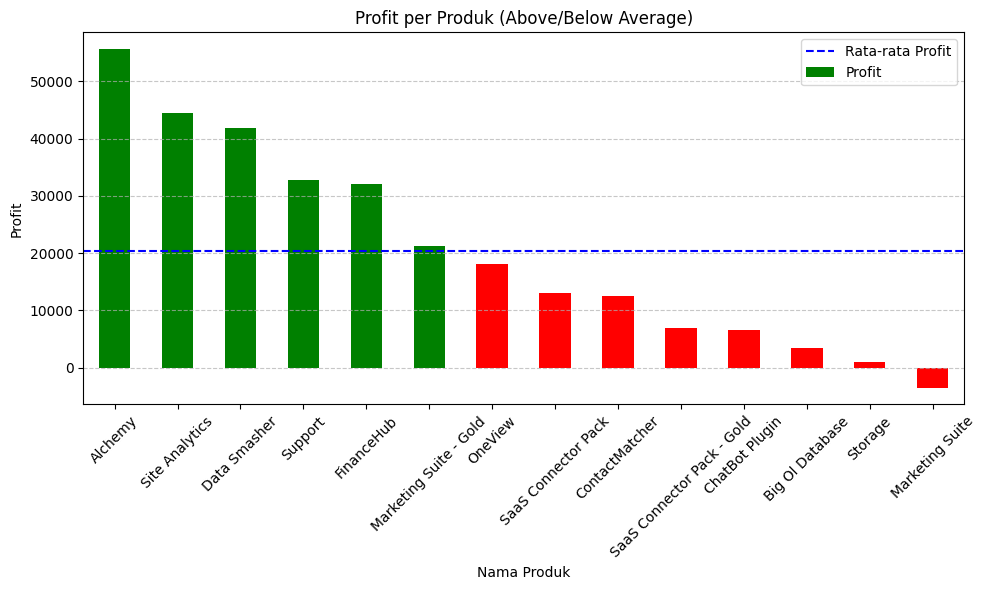

In [232]:
# Menggunakan groupby untuk mengelompokkan berdasarkan Nama_Produk, kemudian menghitung profit per produk
profit_per_produk = df_prep.groupby('Product')['Profit'].sum()

# Mengurutkan berdasarkan jumlah profit secara descending
profit_per_produk = profit_per_produk.sort_values(ascending=False)

# Menghitung rata-rata profit
rata_rata_profit = profit_per_produk.mean()

# Menentukan warna berdasarkan apakah profit di atas atau sama dengan rata-rata atau tidak
colors = ['green' if profit >= rata_rata_profit else 'red' for profit in profit_per_produk]

# Plotting
plt.figure(figsize=(10, 6))
profit_per_produk.plot(kind='bar', color=colors)
plt.axhline(y=rata_rata_profit, color='blue', linestyle='--', linewidth=1.5, label='Rata-rata Profit')
plt.title('Profit per Produk (Above/Below Average)')
plt.xlabel('Nama Produk')
plt.ylabel('Profit')
plt.xticks(rotation=45)  # Rotasi label x agar lebih mudah dibaca
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dapat dilihat, bahwa profit per produk yang memiliki warna hijau merupakan produk yang memiliki profit diatas rata rata, sedangkan yang berwarna merah merupakan produk yang memiliki profit dibawah rata rata. 
- 3 produk teratas yang memiliki profit terbesar adalah: 
    - alchemy
    - site analytics
    - data smasher
- 3 produk profit terendah dimiliki oleh :
    - Big Ol Database
    - storage
    - marketing Suite.

### Sales

Pengecekkan normal test

In [233]:
# cek distribusi kolom Profit
from scipy.stats import normaltest
stats, pval=normaltest(df_prep['Sales'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


Karena tidak normal, gunakan kruskal wallis

In [234]:
from scipy.stats import kruskal
# data Sales untuk setiap kelompok produk
Sales_Marketing_Suite = df_prep[df_prep['Product'] == 'Marketing Suite']['Sales']
Sales_FinanceHub = df_prep[df_prep['Product'] == 'FinanceHub']['Sales']
Sales_ContactMatcher = df_prep[df_prep['Product'] == 'ContactMatcher']['Sales']
Sales_Marketing_Suite_Gold = df_prep[df_prep['Product'] == 'Marketing Suite - Gold']['Sales']
Sales_SaaS_Connector_Pack = df_prep[df_prep['Product'] == 'SaaS Connector Pack']['Sales']
Sales_ChatBot_Plugin= df_prep[df_prep['Product'] == 'ChatBot Plugin']['Sales']
Sales_Site_Analytics = df_prep[df_prep['Product'] == 'Site Analytics']['Sales']
Sales_OneView = df_prep[df_prep['Product'] == 'OneView']['Sales']
Sales_Support= df_prep[df_prep['Product'] == 'Support']['Sales']
Sales_Data_Smasher = df_prep[df_prep['Product'] == 'Data Smasher']['Sales']
Sales_SaaS_Connector_Pack_Gold = df_prep[df_prep['Product'] == 'SaaS Connector Pack - Gold']['Sales']
Sales_SaaS_Storage = df_prep[df_prep['Product'] == 'Storage']['Sales']
Sales_Big_Ol_Database = df_prep[df_prep['Product'] == 'Big Ol Database']['Sales']
Sales_Alchemy = df_prep[df_prep['Product'] == 'Alchemy']['Sales']

# Melakukan uji Kruskal-Wallis
statistic, p_value = kruskal(Sales_Marketing_Suite, Sales_FinanceHub, Sales_ContactMatcher, Sales_Marketing_Suite_Gold, Sales_SaaS_Connector_Pack,Sales_ChatBot_Plugin, Sales_Site_Analytics, Sales_OneView, Sales_Support, Sales_Data_Smasher, Sales_SaaS_Connector_Pack_Gold, Sales_SaaS_Storage, Sales_Big_Ol_Database, Sales_Alchemy )

# Menampilkan hasil uji
print("Kruskal-Wallis statistic:", statistic)
print("p-value:", p_value)

# Menginterpretasikan hasil
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara setidaknya dua kelompok produk.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok produk.")

Kruskal-Wallis statistic: 2763.0537257623664
p-value: 0.0
Terdapat perbedaan yang signifikan antara setidaknya dua kelompok produk.


Karena terdapat perbedaan yang signifikan, mari kita lihat visualisasi dibawah ini untuk mempelajari lebih lanjut

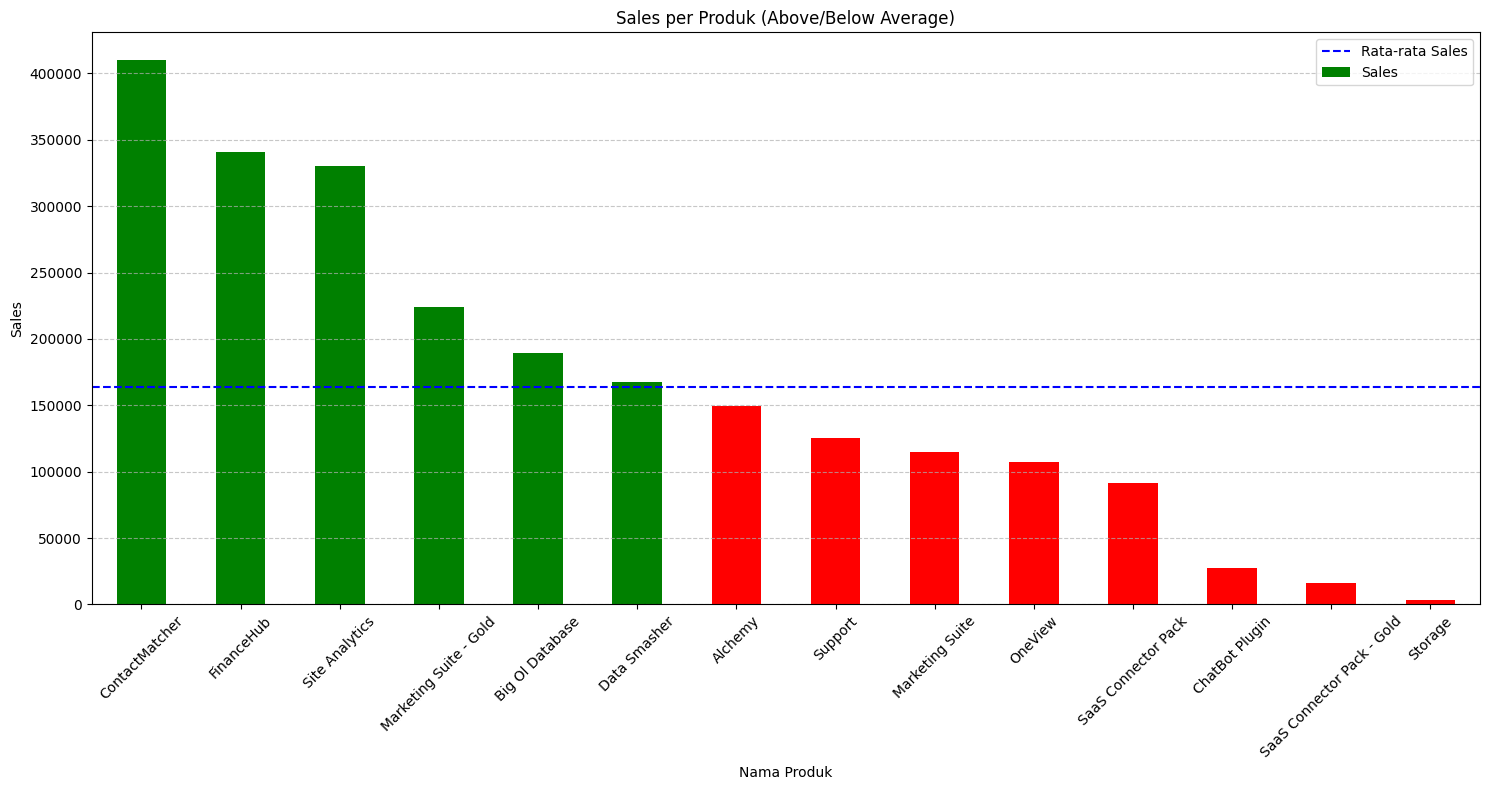

In [235]:
# Menggunakan groupby untuk mengelompokkan berdasarkan Nama_Produk, kemudian menghitung Sales per produk
Sales_per_produk = df_prep.groupby('Product')['Sales'].sum()

# Mengurutkan berdasarkan jumlah Sales secara descending
Sales_per_produk = Sales_per_produk.sort_values(ascending=False)

# Menghitung rata-rata Sales
rata_rata_Sales = Sales_per_produk.mean()

# Menentukan warna berdasarkan apakah Sales di atas atau sama dengan rata-rata atau tidak
colors = ['green' if Sales >= rata_rata_Sales else 'red' for Sales in Sales_per_produk]

# Plotting
plt.figure(figsize=(15, 8))
Sales_per_produk.plot(kind='bar', color=colors)
plt.axhline(y=rata_rata_Sales, color='blue', linestyle='--', linewidth=1.5, label='Rata-rata Sales')
plt.title('Sales per Produk (Above/Below Average)')
plt.xlabel('Nama Produk')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotasi label x agar lebih mudah dibaca
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Namun, dapat dilihat, walaupun profit dari alchemy merupakan yang terbesar, namun secara sales alchemy berada dibawah rata rata. Lalu contact matcher memiliki sales tertinggi dibandingkan produk lain meskipun contactmather memiliki profit dibawah rata rata.  Meskipun memiliki profit terbesar, Alchemy mungkin mengalami penjualan yang lebih rendah dari yang diharapkan karena beberapa faktor. Salah satunya bisa jadi karena target pasar Alchemy lebih kecil daripada produk lainnya, atau mungkin ada masalah dengan strategi pemasaran atau penjualan yang menghambat pertumbuhan penjualan. 
- 3 produk teratas yang memiliki Sales terbesar adalah: 
    - ContactMatcher
    - FinanceHub
    - Site Analytics
- 3 produk Sales terendah dimiliki oleh :
    - ChatBot Plugin
    - SaaS Connector Pack-Gold
    - Storage

### Quantity

Pengecekkan normal test

In [236]:
# cek distribusi kolom Profit
from scipy.stats import normaltest
stats, pval=normaltest(df_prep['Quantity'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


karena tidak normal, mari gunakan kruskal wallis

In [237]:
from scipy.stats import kruskal
# data Quantity untuk setiap kelompok produk
Quantity_Marketing_Suite = df_prep[df_prep['Product'] == 'Marketing Suite']['Quantity']
Quantity_FinanceHub = df_prep[df_prep['Product'] == 'FinanceHub']['Quantity']
Quantity_ContactMatcher = df_prep[df_prep['Product'] == 'ContactMatcher']['Quantity']
Quantity_Marketing_Suite_Gold = df_prep[df_prep['Product'] == 'Marketing Suite - Gold']['Quantity']
Quantity_SaaS_Connector_Pack = df_prep[df_prep['Product'] == 'SaaS Connector Pack']['Quantity']
Quantity_ChatBot_Plugin= df_prep[df_prep['Product'] == 'ChatBot Plugin']['Quantity']
Quantity_Site_Analytics = df_prep[df_prep['Product'] == 'Site Analytics']['Quantity']
Quantity_OneView = df_prep[df_prep['Product'] == 'OneView']['Quantity']
Quantity_Support= df_prep[df_prep['Product'] == 'Support']['Quantity']
Quantity_Data_Smasher = df_prep[df_prep['Product'] == 'Data Smasher']['Quantity']
Quantity_SaaS_Connector_Pack_Gold = df_prep[df_prep['Product'] == 'SaaS Connector Pack - Gold']['Quantity']
Quantity_SaaS_Storage = df_prep[df_prep['Product'] == 'Storage']['Quantity']
Quantity_Big_Ol_Database = df_prep[df_prep['Product'] == 'Big Ol Database']['Quantity']
Quantity_Alchemy = df_prep[df_prep['Product'] == 'Alchemy']['Quantity']

# Melakukan uji Kruskal-Wallis
statistic, p_value = kruskal(Quantity_Marketing_Suite, Quantity_FinanceHub, Quantity_ContactMatcher, Quantity_Marketing_Suite_Gold, Quantity_SaaS_Connector_Pack,Quantity_ChatBot_Plugin, Quantity_Site_Analytics, Quantity_OneView, Quantity_Support, Quantity_Data_Smasher, Quantity_SaaS_Connector_Pack_Gold, Quantity_SaaS_Storage, Quantity_Big_Ol_Database, Quantity_Alchemy )

# Menampilkan hasil uji
print("Kruskal-Wallis statistic:", statistic)
print("p-value:", p_value)

# Menginterpretasikan hasil
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara setidaknya dua kelompok produk.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok produk.")

Kruskal-Wallis statistic: 19.998605881291507
p-value: 0.09524502358890823
Tidak terdapat perbedaan yang signifikan antara kelompok produk.


Karena tidak dapat perbedaan yang signifikan, produk tidak perlu diperhatikan terhadap quantity, namun mari kita tetap melihat visualisasinya walaupun tidak terlalu ada perbedaan yang signifikan untuk mendapatkan informasi tambahan


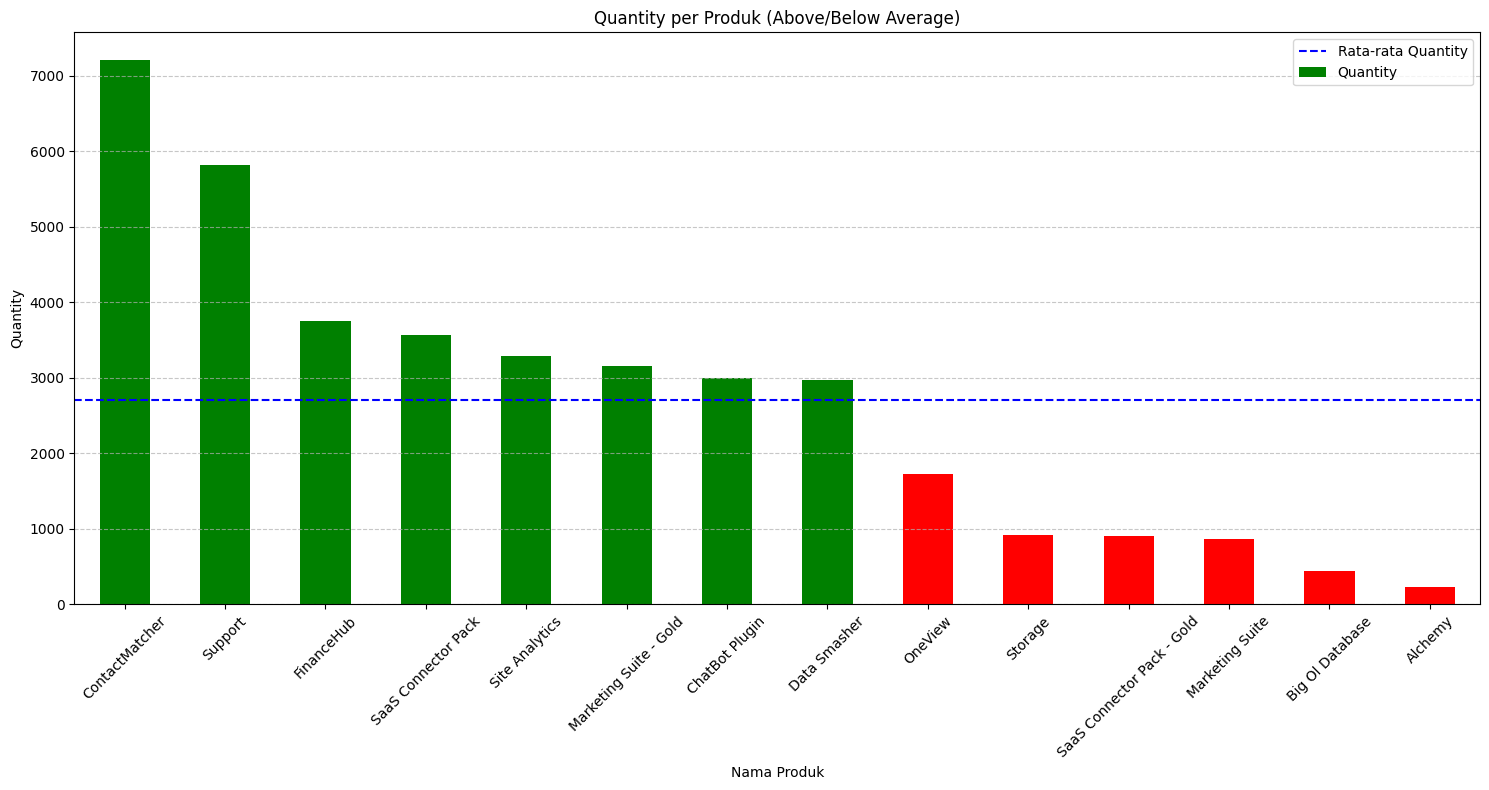

In [238]:
# Menggunakan groupby untuk mengelompokkan berdasarkan Nama_Produk, kemudian menghitung Quantity per produk
Quantity_per_produk = df_prep.groupby('Product')['Quantity'].sum()

# Mengurutkan berdasarkan jumlah Quantity secara descending
Quantity_per_produk = Quantity_per_produk.sort_values(ascending=False)

# Menghitung rata-rata Quantity
rata_rata_Quantity = Quantity_per_produk.mean()

# Menentukan warna berdasarkan apakah Quantity di atas atau sama dengan rata-rata atau tidak
colors = ['green' if Quantity >= rata_rata_Quantity else 'red' for Quantity in Quantity_per_produk]

# Plotting
plt.figure(figsize=(15, 8))
Quantity_per_produk.plot(kind='bar', color=colors)
plt.axhline(y=rata_rata_Quantity, color='blue', linestyle='--', linewidth=1.5, label='Rata-rata Quantity')
plt.title('Quantity per Produk (Above/Below Average)')
plt.xlabel('Nama Produk')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotasi label x agar lebih mudah dibaca
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Quantity penjualan tertinggi berada pada penjualan contactmatcher dan terendah pada alchemy. Meskipun memiliki profit terbesar, Alchemy mungkin memiliki jumlah unit yang dijual lebih sedikit. Hal ini bisa disebabkan oleh harga produk yang tinggi sehingga membatasi jumlah pembeli, atau mungkin Alchemy fokus pada penjualan kepada segmen pasar yang lebih eksklusif atau terbatas.
- 3 produk teratas yang memiliki Quantity terbesar adalah: 
    - ContactMatcher
    - Support
    - FinanceHub
- 3 produk Quantity terendah dimiliki oleh :
    - Markerting Suite
    - Big Ol Database
    - Alchemy

## Profit/Quantity/Sales per Discount

In [239]:
df_prep['Discount'].sort_values().unique()

array([0.  , 0.1 , 0.15, 0.2 , 0.3 , 0.32, 0.4 , 0.45, 0.5 , 0.6 , 0.7 ,
       0.8 ])

Pertama, lakukan pengecekkan normal test

In [240]:
# cek distribusi kolom Profit
from scipy.stats import normaltest
stats, pval=normaltest(df_prep['Profit'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


Karena tidak normal, gunakan kruskal wallis

In [241]:
from scipy.stats import kruskal
# data profit untuk setiap kelompok diskon
profit_0_percent = df_prep[df_prep['Discount'] == 0]['Profit']
profit_10_percent = df_prep[df_prep['Discount'] == 0.1]['Profit']
profit_15_percent = df_prep[df_prep['Discount'] == 0.15]['Profit']
profit_20_percent = df_prep[df_prep['Discount'] == 0.2]['Profit']
profit_30_percent = df_prep[df_prep['Discount'] == 0.3]['Profit']
profit_32_percent = df_prep[df_prep['Discount'] == 0.32]['Profit']
profit_40_percent = df_prep[df_prep['Discount'] == 0.40]['Profit']
profit_50_percent = df_prep[df_prep['Discount'] == 0.50]['Profit']
profit_60_percent = df_prep[df_prep['Discount'] == 0.60]['Profit']
profit_70_percent = df_prep[df_prep['Discount'] == 0.70]['Profit']
profit_80_percent = df_prep[df_prep['Discount'] == 0.80]['Profit']

# Melakukan uji Kruskal-Wallis
statistic, p_value = kruskal(profit_0_percent, profit_10_percent, profit_15_percent, profit_20_percent, profit_30_percent, profit_32_percent,
                             profit_40_percent, profit_50_percent, profit_60_percent, profit_70_percent, profit_80_percent)

# Menampilkan hasil uji
print("Kruskal-Wallis statistic:", statistic)
print("p-value:", p_value)

# Menginterpretasikan hasil
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara setidaknya dua kelompok diskon.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok diskon.")

Kruskal-Wallis statistic: 3643.3161631836547
p-value: 0.0
Terdapat perbedaan yang signifikan antara setidaknya dua kelompok diskon.


Karena terdapat perbedaan yang signifikan, mari kita lihat visualisasi dibawah ini untuk mempelajari lebih lanjut

### Profit

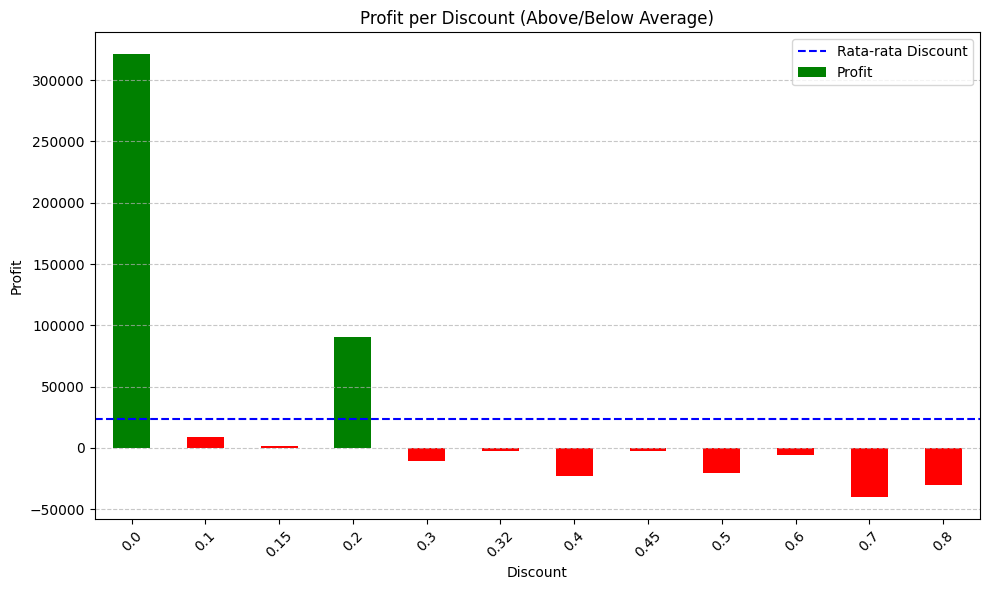

In [242]:
# Menggunakan groupby untuk mengelompokkan berdasarkan Discount, kemudian menghitung Discount per produk
Discount_per_produk = df_prep.groupby('Discount')['Profit'].sum()

# Menghitung rata-rata Discount
rata_rata_Discount = Discount_per_produk.mean()

# Menentukan warna berdasarkan apakah Discount di atas atau sama dengan rata-rata atau tidak
colors = ['green' if Discount >= rata_rata_Discount else 'red' for Discount in Discount_per_produk]

# Plotting
plt.figure(figsize=(10, 6))
Discount_per_produk.plot(kind='bar', color=colors)
plt.axhline(y=rata_rata_Discount, color='blue', linestyle='--', linewidth=1.5, label='Rata-rata Discount')
plt.title('Profit per Discount (Above/Below Average)')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.xticks(rotation=45)  # Rotasi label x agar lebih mudah dibaca
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Terlihat dari data, profit pada penjualan pada penerapan diskon 0% dan 20% memiliki profit diatas rata rata, hal ini dapat terjadi karena beberapa alasan, antara lain:
- Margin Keuntungan yang Lebih Tinggi: produk memiliki margin keuntungan yang lebih besar pada harga penuh atau dengan diskon yang lebih rendah, seperti 0% atau 20%. Dengan demikian, meskipun harga jualnya lebih rendah karena diskon, margin keuntungan absolutnya tetap tinggi, yang dapat menghasilkan profit yang lebih besar.

- Volume Penjualan yang Lebih Tinggi: Diskon yang diberikan pada tingkat 0% dan 20% mungkin menarik lebih banyak pelanggan untuk membeli produk. Dengan peningkatan volume penjualan, meskipun margin keuntungan per unit mungkin lebih rendah karena diskon, total profit yang dihasilkan bisa lebih tinggi karena jumlah unit yang terjual lebih banyak.

### Sales

Pengecekan normal test

In [243]:
# cek distribusi kolom Sales
from scipy.stats import normaltest
stats, pval=normaltest(df_prep['Sales'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


Karena tidak normal, gunakan kruskal wallis

In [244]:
from scipy.stats import kruskal
# data Sales untuk setiap kelompok diskon
Sales_0_percent = df_prep[df_prep['Discount'] == 0]['Sales']
Sales_10_percent = df_prep[df_prep['Discount'] == 0.1]['Sales']
Sales_15_percent = df_prep[df_prep['Discount'] == 0.15]['Sales']
Sales_20_percent = df_prep[df_prep['Discount'] == 0.2]['Sales']
Sales_30_percent = df_prep[df_prep['Discount'] == 0.3]['Sales']
Sales_32_percent = df_prep[df_prep['Discount'] == 0.32]['Sales']
Sales_40_percent = df_prep[df_prep['Discount'] == 0.40]['Sales']
Sales_50_percent = df_prep[df_prep['Discount'] == 0.50]['Sales']
Sales_60_percent = df_prep[df_prep['Discount'] == 0.60]['Sales']
Sales_70_percent = df_prep[df_prep['Discount'] == 0.70]['Sales']
Sales_80_percent = df_prep[df_prep['Discount'] == 0.80]['Sales']

# Melakukan uji Kruskal-Wallis
statistic, p_value = kruskal(Sales_0_percent, Sales_10_percent, Sales_15_percent, Sales_20_percent, Sales_30_percent, Sales_32_percent,
                             Sales_40_percent, Sales_50_percent, Sales_60_percent, Sales_70_percent, Sales_80_percent)

# Menampilkan hasil uji
print("Kruskal-Wallis statistic:", statistic)
print("p-value:", p_value)

# Menginterpretasikan hasil
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara setidaknya dua kelompok diskon.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok diskon.")

Kruskal-Wallis statistic: 1302.603277922773
p-value: 1.0492546879267572e-273
Terdapat perbedaan yang signifikan antara setidaknya dua kelompok diskon.


Karena terdapat perbedaan yang signifikan, mari kita lihat visualisasi dibawah ini untuk mempelajari lebih lanjut

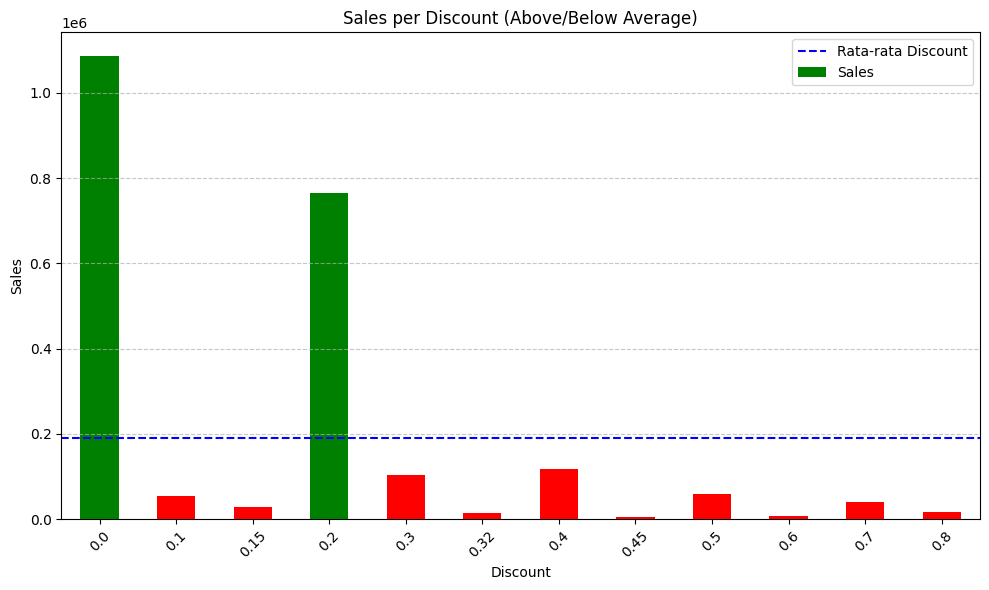

In [245]:
# Menggunakan groupby untuk mengelompokkan berdasarkan Discount, kemudian menghitung Discount per produk
Discount_per_produk = df_prep.groupby('Discount')['Sales'].sum()

# Menghitung rata-rata Discount
rata_rata_Discount = Discount_per_produk.mean()

# Menentukan warna berdasarkan apakah Discount di atas atau sama dengan rata-rata atau tidak
colors = ['green' if Discount >= rata_rata_Discount else 'red' for Discount in Discount_per_produk]

# Plotting
plt.figure(figsize=(10, 6))
Discount_per_produk.plot(kind='bar', color=colors)
plt.axhline(y=rata_rata_Discount, color='blue', linestyle='--', linewidth=1.5, label='Rata-rata Discount')
plt.title('Sales per Discount (Above/Below Average)')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotasi label x agar lebih mudah dibaca
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari data diatas, penerapan diskon 0% dan 20 % memiliki sales tertinggi, hal ini terjadi karena beberapa faktor antara lain:
- Kesadaran akan Nilai Produk: Produk SaaS sering kali memiliki nilai tambah yang signifikan bagi pelanggan dalam hal efisiensi, produktivitas, atau penghematan biaya. Pada tingkat diskon 0% dan 20%, pelanggan mungkin lebih menyadari nilai-nilai ini dan merasa lebih termotivasi untuk membeli.

- Persepsi Nilai yang Lebih Tinggi: Pelanggan mungkin merasa bahwa mereka mendapatkan kesepakatan yang lebih baik dengan diskon 20%, bahkan jika produk sebenarnya memiliki nilai yang sama dengan harga penuh. Persepsi nilai yang lebih tinggi ini dapat memotivasi mereka untuk membeli produk.

### Quantity

In [246]:
# cek distribusi kolom Quantity
from scipy.stats import normaltest
stats, pval=normaltest(df_prep['Quantity'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


Karena tidak normal, guanakn kruskal wallis

In [247]:
from scipy.stats import kruskal
# data Quantity untuk setiap kelompok diskon
Quantity_0_percent = df_prep[df_prep['Discount'] == 0]['Quantity']
Quantity_10_percent = df_prep[df_prep['Discount'] == 0.1]['Quantity']
Quantity_15_percent = df_prep[df_prep['Discount'] == 0.15]['Quantity']
Quantity_20_percent = df_prep[df_prep['Discount'] == 0.2]['Quantity']
Quantity_30_percent = df_prep[df_prep['Discount'] == 0.3]['Quantity']
Quantity_32_percent = df_prep[df_prep['Discount'] == 0.32]['Quantity']
Quantity_40_percent = df_prep[df_prep['Discount'] == 0.40]['Quantity']
Quantity_50_percent = df_prep[df_prep['Discount'] == 0.50]['Quantity']
Quantity_60_percent = df_prep[df_prep['Discount'] == 0.60]['Quantity']
Quantity_70_percent = df_prep[df_prep['Discount'] == 0.70]['Quantity']
Quantity_80_percent = df_prep[df_prep['Discount'] == 0.80]['Quantity']

# Melakukan uji Kruskal-Wallis
statistic, p_value = kruskal(Quantity_0_percent, Quantity_10_percent, Quantity_15_percent, Quantity_20_percent, Quantity_30_percent, Quantity_32_percent,
                             Quantity_40_percent, Quantity_50_percent, Quantity_60_percent, Quantity_70_percent, Quantity_80_percent)

# Menampilkan hasil uji
print("Kruskal-Wallis statistic:", statistic)
print("p-value:", p_value)

# Menginterpretasikan hasil
alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan yang signifikan antara setidaknya dua kelompok diskon.")
else:
    print("Tidak terdapat perbedaan yang signifikan antara kelompok diskon.")

Kruskal-Wallis statistic: 9.286410503107728
p-value: 0.5051550777996752
Tidak terdapat perbedaan yang signifikan antara kelompok diskon.


Karena tidak dapat perbedaan yang signifikan, Discount tidak perlu diperhatikan terhadap quantity, namun mari kita tetap melihat visualisasinya walaupun tidak terlalu ada perbedaan yang signifikan untuk mendapatkan informasi tambahan

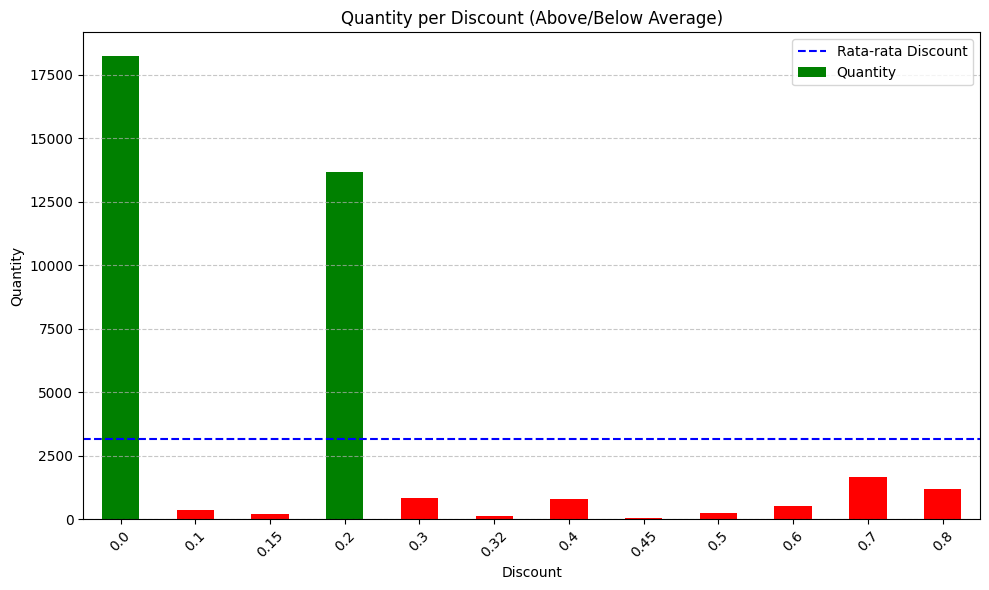

In [248]:
# Menggunakan groupby untuk mengelompokkan berdasarkan Discount, kemudian menghitung Discount per produk
Discount_per_produk = df_prep.groupby('Discount')['Quantity'].sum()

# Menghitung rata-rata Discount
rata_rata_Discount = Discount_per_produk.mean()

# Menentukan warna berdasarkan apakah Discount di atas atau sama dengan rata-rata atau tidak
colors = ['green' if Discount >= rata_rata_Discount else 'red' for Discount in Discount_per_produk]

# Plotting
plt.figure(figsize=(10, 6))
Discount_per_produk.plot(kind='bar', color=colors)
plt.axhline(y=rata_rata_Discount, color='blue', linestyle='--', linewidth=1.5, label='Rata-rata Discount')
plt.title('Quantity per Discount (Above/Below Average)')
plt.xlabel('Discount')
plt.ylabel('Quantity')
plt.xticks(rotation=45)  # Rotasi label x agar lebih mudah dibaca
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari data diatas, penerapan diskon 0% dan 20 % memiliki quantity tertinggi, hal ini terjadi karena beberapa faktor antara lain:
- Persepsi Nilai yang Tidak Seimbang: Diskon besar seperti 80% mungkin membuat pelanggan meragukan nilai sebenarnya dari produk. Meskipun harga jual menjadi sangat murah, ini juga bisa membuat pelanggan bertanya-tanya tentang kualitas produk atau menganggap bahwa ada sesuatu yang tidak beres dengan produk tersebut. Sebaliknya, diskon 0% dan 20% menawarkan harga yang lebih stabil dan dianggap sebagai penawaran yang lebih adil, yang dapat lebih menarik bagi pelanggan.

- Efek Psikologis: Pelanggan mungkin terpengaruh oleh efek psikologis yang berbeda dari diskon yang lebih rendah (0% dan 20%) dibandingkan dengan diskon yang lebih besar. Diskon yang lebih besar mungkin membuat pelanggan merasa bahwa ada kesempatan yang terlalu baik untuk dilewatkan atau membuat mereka ragu tentang kualitas produk.

## Pembagian Per Segment dan Negara

### Per product segment

Masuk ke faktor eksternal, kita akan melihat segmentasi pelanggan berdasarkan negaranya

In [249]:
df_prep2=pd.crosstab(df_prep['Product'],df_prep['Segment'])
df_prep2['Total']=df_prep2.sum(axis=1)
df_prep2.sort_values('Total',ascending=False)

Segment,Enterprise,SMB,Strategic,Total
Product,,,,
ContactMatcher,324,939,579,1842
Support,298,793,469,1560
FinanceHub,173,518,290,981
SaaS Connector Pack,175,494,288,957
Site Analytics,166,451,272,889
Marketing Suite - Gold,136,450,260,846
ChatBot Plugin,150,428,218,796
Data Smasher,140,408,227,775
OneView,67,244,155,466


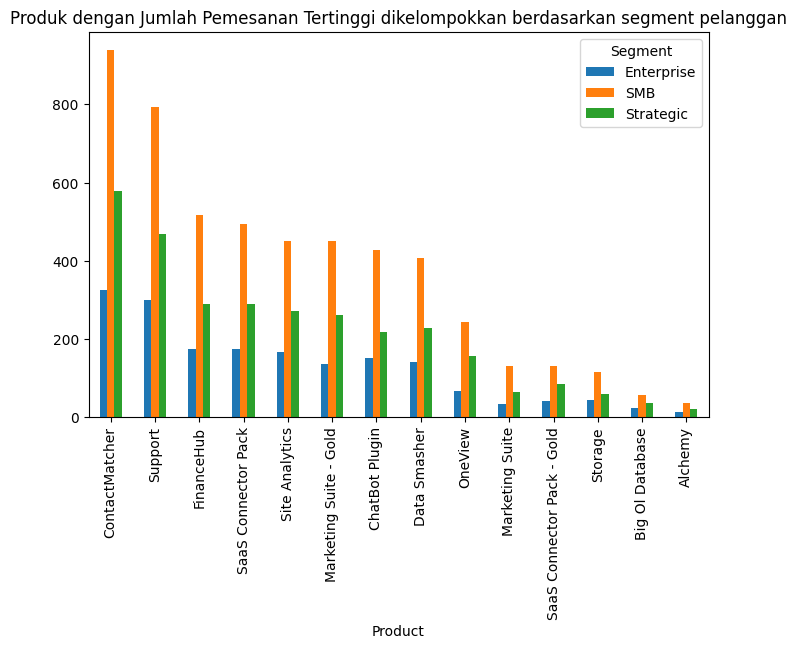

In [250]:
df_prep2.sort_values(by=df_prep2.columns[1], ascending=False).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='Produk dengan Jumlah Pemesanan Tertinggi dikelompokkan berdasarkan segment pelanggan')
plt.show()

Dari hasil analisis cross tabulation dan visualisasi di atas, kita dapat mengamati 10 produk dengan jumlah pemesanan terbanyak, disertai dengan pembagian segmen pelanggannya. Dapat dilihat, bahwa dari 10 produk terbanyak, SMB selalu menjadi segmen dengan pemesanan terbanyak dan enterprise selalu menjadi segmen terkecil dalam pemesanan.

### per negara segment

In [251]:
df_prep2=pd.crosstab(df_prep['Country'],df_prep['Segment'])
df_prep2['Total']=df_prep2.sum(axis=1)
df_prep2.sort_values('Total',ascending=False).head(10)

Segment,Enterprise,SMB,Strategic,Total
Country,,,,
United States,335,1048,618,2001
United Kingdom,164,653,324,1141
Japan,149,524,312,985
France,107,284,196,587
Canada,100,275,131,506
Australia,96,276,120,492
Mexico,91,255,123,469
Germany,67,180,136,383
Brazil,53,132,70,255


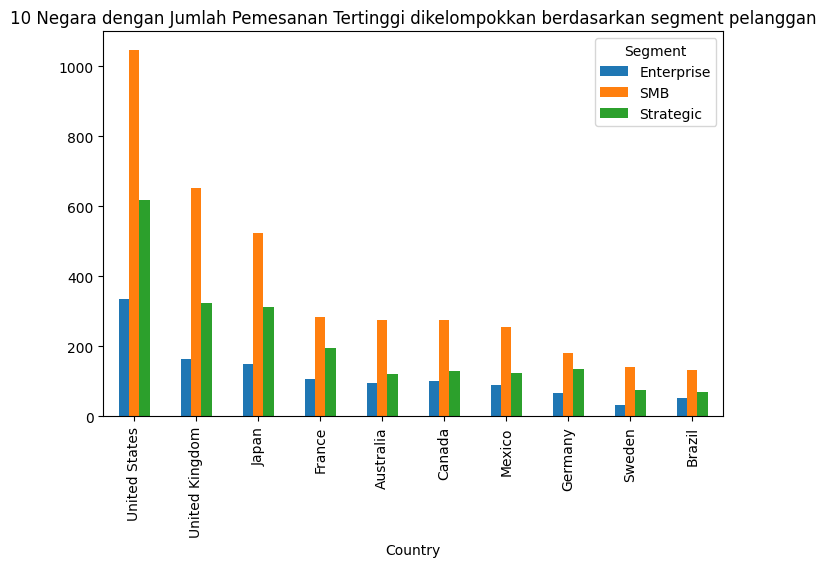

In [252]:
df_prep2.sort_values(by=df_prep2.columns[1], ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='10 Negara dengan Jumlah Pemesanan Tertinggi dikelompokkan berdasarkan segment pelanggan')
plt.show()

Dari hasil analisis cross tabulation dan visualisasi di atas, kita dapat mengamati 10 negara dengan jumlah pemesanan terbanyak, disertai dengan pembagian segmen pelanggannya. Dapat dilihat, bahwa Amerika serikat memiliki jumlah pemesanan terbanyak dari negara lain. Dapat dilihat juga, bahwa dari 10 negara terbanyak, SMB selalu menjadi segmen dengan pemesanan terbanyak dan enterprise selalu menjadi segmen terkecil dalam pemesanan.

Ada beberapa alasan mengapa perusahaan SMB lebih cenderung untuk memesan solusi SaaS dibandingkan dengan perusahaan enterprise dan strategic:
- Biaya yang Lebih Rendah: SaaS sering kali memiliki model biaya langganan yang lebih terjangkau daripada perangkat lunak tradisional yang memerlukan investasi modal awal yang besar. Untuk perusahaan SMB yang memiliki anggaran terbatas, model biaya langganan ini bisa menjadi lebih menarik karena mereka dapat membayar hanya untuk layanan yang mereka gunakan tanpa harus mengeluarkan biaya tambahan untuk infrastruktur IT.

- Aksesibilitas dan Kemudahan Penggunaan: Solusi SaaS sering kali dirancang dengan antarmuka yang mudah digunakan dan dapat diakses dari mana saja dengan koneksi internet. Ini bisa menjadi keuntungan besar bagi perusahaan SMB yang mungkin tidak memiliki sumber daya untuk melatih staf mereka dalam penggunaan perangkat lunak yang rumit atau untuk mengelola infrastruktur IT yang kompleks.

- Tidak Memerlukan Tim IT yang Besar: Implementasi dan pemeliharaan solusi SaaS umumnya lebih mudah dan membutuhkan lebih sedikit sumber daya IT dibandingkan dengan solusi perangkat lunak lokal yang memerlukan infrastruktur dan tim IT yang besar. Untuk perusahaan SMB yang mungkin memiliki tim IT yang lebih kecil atau bahkan tidak memiliki tim IT internal, ini bisa menjadi faktor penting.

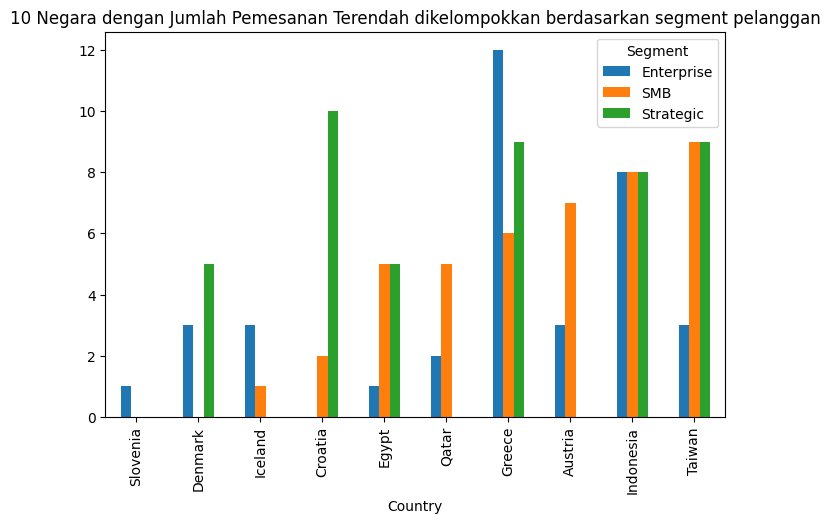

In [296]:
df_prep2.sort_values(by=df_prep2.columns[1], ascending=True).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='10 Negara dengan Jumlah Pemesanan Terendah dikelompokkan berdasarkan segment pelanggan')
plt.show()

Lain halnya dengan 10 negara terkecil jumlah pemesanannya, negara negara ini tidak terlihat memiliki pola yang mirip.

Perbedaan dalam jumlah pemesanan SaaS sales antara negara-negara dengan penjualan yang tinggi dan rendah ini dapat disebabkan oleh beberapa faktor berikut:
- Ukuran Pasar dan Kedewasaan Industri: Negara-negara seperti Amerika Serikat, Inggris, dan Jepang memiliki pasar yang lebih besar dan industri SaaS yang lebih berkembang. Ini dapat mengakibatkan lebih banyak peluang untuk penjualan SaaS dan permintaan yang lebih tinggi dari perusahaan dan konsumen. 

- Penggunaan Teknologi: Negara-negara dengan tingkat adopsi teknologi yang lebih tinggi cenderung memiliki permintaan yang lebih besar untuk solusi SaaS. Amerika Serikat, Inggris, dan Jepang sering kali menjadi pemimpin dalam adopsi teknologi baru dan inovasi, yang dapat meningkatkan permintaan untuk solusi SaaS.

- Kondisi Ekonomi: Kondisi ekonomi suatu negara dapat mempengaruhi pengeluaran bisnis dan konsumen. Negara-negara dengan perekonomian yang kuat dan stabilitas finansial yang tinggi cenderung memiliki lebih banyak perusahaan yang siap untuk berinvestasi dalam solusi SaaS.

- Aksesibilitas dan Infrastruktur Teknologi: Infrastruktur teknologi yang baik dan aksesibilitas internet yang luas juga penting untuk adopsi SaaS. Negara-negara dengan infrastruktur teknologi yang berkembang baik dan akses internet yang cepat cenderung memiliki lebih banyak pelanggan potensial untuk solusi SaaS.

Selanjutnya, mari kita lihat hubungan profit, sales, dan quantity per negara

## RFM Country

### Defining Recency Frequency Monetary based on Country

In [254]:
# Dengan asumsi 'df_prep' adalah DataFrame Anda dengan kolom-kolom yang diperlukan


#Untuk Recency, kita perlu menemukan tanggal pembelian paling baru untuk setiap negara dan menguranginya dari tanggal referensi'
reference_date = df_prep['Order Date'].max() + pd.Timedelta(days=1)  # Biasanya satu hari setelah transaksi terakhir
df_country = df_prep.groupby('Country').agg(
    Recency=('Order Date', lambda x: (reference_date - x.max()).days),
    Frequency=('Order ID', 'nunique'),  # hitung ID pesanan unik untuk frekuensi
    Monetary=('Sales', 'sum')  # jumlahkan penjualan untuk nilai moneternya'
).reset_index()
df_country.sort_values(by='Monetary').head()

,Country,Recency,Frequency,Monetary
33,Qatar,3,2,919.910
18,Iceland,80,2,1209.824
12,Denmark,470,3,1270.530
10,Croatia,50,5,1315.560
37,Slovenia,419,1,1603.136


<Axes: xlabel='Recency', ylabel='Count'>

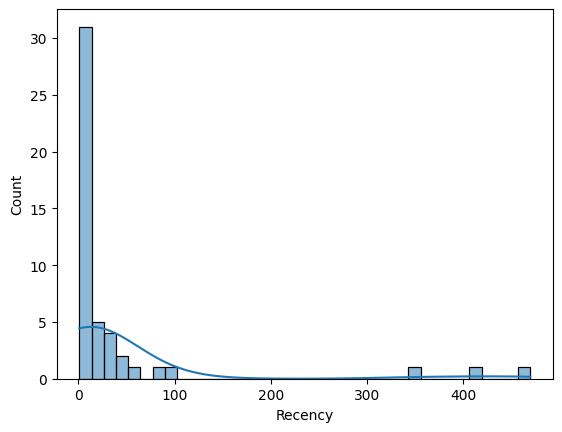

In [255]:
sns.histplot(df_country['Recency'], kde=True)

<Axes: xlabel='Frequency', ylabel='Count'>

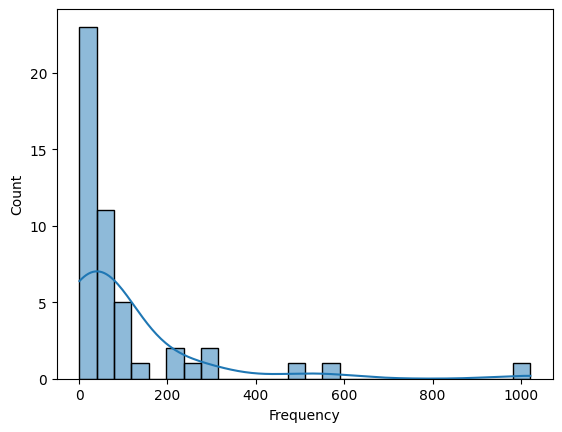

In [256]:
sns.histplot(df_country['Frequency'], kde=True)

<Axes: xlabel='Monetary', ylabel='Count'>

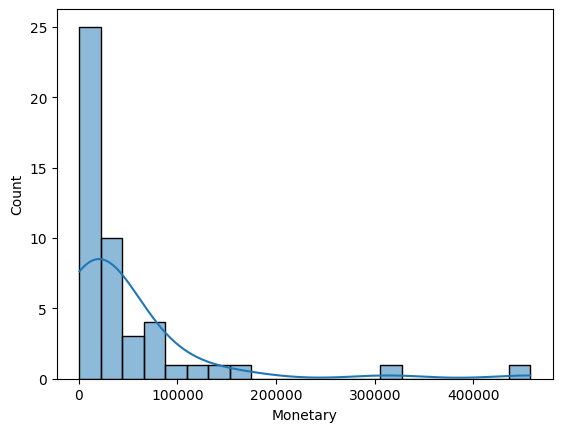

In [257]:
sns.histplot(df_country['Monetary'], kde=True)

Dapat dilihat dari histogram diatas, Recency, Frequency dan Monetary yang dilakukan oleh negara negara cenderung memiliki angka yang kecil. Namun, untuk interpretasi terhadap Recency, hal tersebut baik dikarenakan berarti banyak yang melakukan transaksi dekat dekat hari terakhir pada data. Namun, berbeda interpretasinya dengan frequency dan monetary, karena frequency berarti ia melakukan transaksi dengan frekuensi yang kecil, dan monetary yaitu pengeluaran money yang cenderung kecil. Lebih jelasnya mari kita segmentasi menggunakan metode RFM lebih lanjut.

### RFM Country Segmentation

In [258]:
df_country.describe()

,Recency,Frequency,Monetary
count,48.000000,48.000000,48.000000
mean,41.354167,104.375000,47858.351256
std,100.141493,179.845398,81510.619390
min,1.000000,1.000000,919.910000
25%,3.750000,21.750000,8817.455000
50%,8.500000,44.000000,22416.553000
75%,27.250000,95.250000,50210.720000
max,470.000000,1021.000000,457687.631500


In [259]:
def rfm_segment(baris):
    # Recency
    if baris['Recency'] <= 3.75:
        r_score = 4
    elif (baris['Recency'] >= 3.75) and (baris['Recency'] <= 8.5):
        r_score = 3
    elif (baris['Recency'] >= 8.5) and (baris['Recency'] <= 27.25):
        r_score = 2
    elif baris['Recency'] >27.25:
        r_score = 1
    
    # Frequency
    if baris['Frequency'] <= 21.75:
        f_score = 1
    elif (baris['Frequency'] >= 21.75) and (baris['Frequency'] <= 44):
        f_score = 2
    elif (baris['Frequency'] >= 44) and (baris['Frequency'] <= 95.25):
        f_score = 3
    elif baris['Frequency'] > 95.25:
        f_score = 4

    # Frequency
    if baris['Monetary'] <= 8817.455000:
        m_score = 1
    elif (baris['Monetary'] >= 8817.455000) and (baris['Monetary'] <= 22416.553000):
        m_score = 2
    elif (baris['Monetary'] >= 22416.553000) and (baris['Monetary'] <= 50210.720000):
        m_score = 3
    elif baris['Monetary'] > 50210.720000:
        m_score = 4
    
    return str(r_score) + str(f_score) + str(m_score)


df_country['RFM Segment']= df_country.apply(rfm_segment, axis =1)
df_country

,Country,Recency,Frequency,Monetary,RFM Segment
0,Argentina,6,61,35764.3120,333
1,Australia,3,276,80166.1010,444
2,Austria,353,4,2865.0200,111
3,Belgium,44,56,17431.1500,132
4,Brazil,2,117,76269.6140,444
5,Canada,2,256,138641.2700,444
6,Chile,7,108,35282.0010,343
7,China,33,46,23705.5230,133
8,Colombia,10,20,8481.7100,211
9,Costa Rica,5,23,7464.9300,321


Mensegmentasi RFM berdasarkan q1, q2 dan q3 dari data

In [260]:
(df_country['RFM Segment'].value_counts() / len(df_country) *100).head(20)

RFM Segment
111    14.583333
444    12.500000
222     8.333333
322     6.250000
244     6.250000
433     6.250000
333     4.166667
223     4.166667
133     4.166667
344     4.166667
311     2.083333
332     2.083333
411     2.083333
123     2.083333
421     2.083333
434     2.083333
233     2.083333
212     2.083333
312     2.083333
321     2.083333
Name: count, dtype: float64

### RFM Score

In [261]:
def rfm_segment(baris):
    # Recency
    if baris['Recency'] <= 3.75:
        r_score = 4
    elif (baris['Recency'] >= 3.75) and (baris['Recency'] <= 8.5):
        r_score = 3
    elif (baris['Recency'] >= 8.5) and (baris['Recency'] <= 27.25):
        r_score = 2
    elif baris['Recency'] >27.25:
        r_score = 1
    
    # Frequency
    if baris['Frequency'] <= 21.75:
        f_score = 1
    elif (baris['Frequency'] >= 21.75) and (baris['Frequency'] <= 44):
        f_score = 2
    elif (baris['Frequency'] >= 44) and (baris['Frequency'] <= 95.25):
        f_score = 3
    elif baris['Frequency'] > 95.25:
        f_score = 4

    # Frequency
    if baris['Monetary'] <= 8817.455000:
        m_score = 1
    elif (baris['Monetary'] >= 8817.455000) and (baris['Monetary'] <= 22416.553000):
        m_score = 2
    elif (baris['Monetary'] >= 22416.553000) and (baris['Monetary'] <= 50210.720000):
        m_score = 3
    elif baris['Monetary'] > 50210.720000:
        m_score = 4
    
    return r_score + f_score + m_score


df_country['RFM Score']= df_country.apply(rfm_segment, axis =1)
df_country

,Country,Recency,Frequency,Monetary,RFM Segment,RFM Score
0,Argentina,6,61,35764.3120,333,9
1,Australia,3,276,80166.1010,444,12
2,Austria,353,4,2865.0200,111,3
3,Belgium,44,56,17431.1500,132,6
4,Brazil,2,117,76269.6140,444,12
5,Canada,2,256,138641.2700,444,12
6,Chile,7,108,35282.0010,343,10
7,China,33,46,23705.5230,133,7
8,Colombia,10,20,8481.7100,211,4
9,Costa Rica,5,23,7464.9300,321,6


<Axes: xlabel='RFM Score', ylabel='Count'>

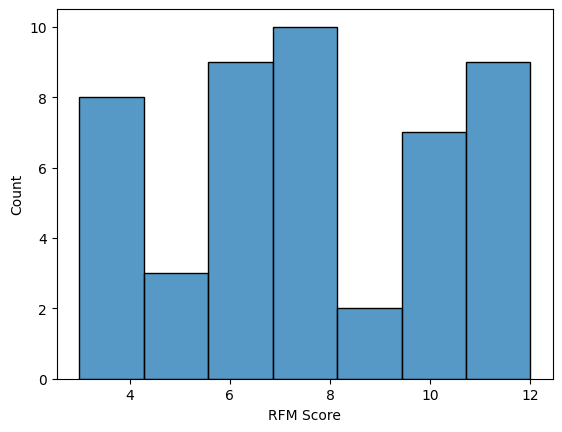

In [262]:
sns.histplot(df_country['RFM Score'])

Dapat dilihat dari grafik diatas, paling banyak negara memiliki RFM Score di rentang 7-8. Dari DRFM Score ini kemungkinan akan banyak pada level yang berada di tengah.

In [263]:
def rfm_level(baris):
    if baris['RFM Score'] >= 11:
        return 'High Opportunity'
    elif (baris['RFM Score'] < 11) and (baris['RFM Score'] >= 8):
        return 'Growing Markets'
    elif (baris['RFM Score'] < 8) and (baris['RFM Score'] >= 5):
        return 'Underdeveloped Markets'
    else:
        return 'At Risk'


df_country['RFM Level']= df_country.apply(rfm_level, axis =1)
df_country

,Country,Recency,Frequency,Monetary,RFM Segment,RFM Score,RFM Level
0,Argentina,6,61,35764.3120,333,9,Growing Markets
1,Australia,3,276,80166.1010,444,12,High Opportunity
2,Austria,353,4,2865.0200,111,3,At Risk
3,Belgium,44,56,17431.1500,132,6,Underdeveloped Markets
4,Brazil,2,117,76269.6140,444,12,High Opportunity
5,Canada,2,256,138641.2700,444,12,High Opportunity
6,Chile,7,108,35282.0010,343,10,Growing Markets
7,China,33,46,23705.5230,133,7,Underdeveloped Markets
8,Colombia,10,20,8481.7100,211,4,At Risk
9,Costa Rica,5,23,7464.9300,321,6,Underdeveloped Markets


Dari nilai RFM score, akan dibagi segmentasinya dengan penjelasan RFM Level sebagai berikut:

- High Opportunity: Negara-negara dengan pembelian terbaru, frekuensi tinggi, dan nilai moneternya tinggi.
- Growing Markets: Negara-negara dengan pembelian terbaru tetapi frekuensi dan nilai moneternya sedang.
- Underdeveloped Markets: Negara-negara dengan pembelian yang jarang dan nilai moneternya rendah.
- At Risk: Negara-negara di mana pembelian jarang, tidak terbaru, dan nilai moneternya rendah.

In [264]:
persen = df_country['RFM Level'].value_counts()/len(df_country)*100
persen

RFM Level
Underdeveloped Markets    41.666667
Growing Markets           22.916667
High Opportunity          18.750000
At Risk                   16.666667
Name: count, dtype: float64

### PIE PLOTS

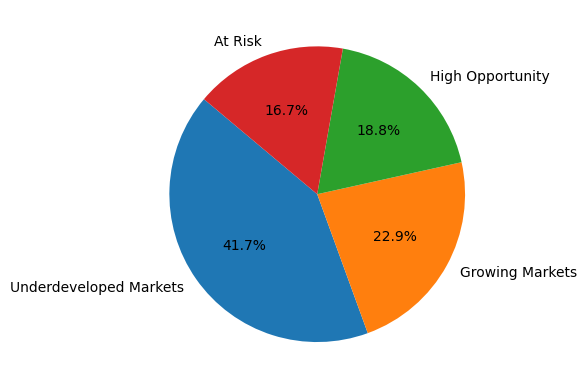

In [265]:
import matplotlib.pyplot as plt
rfm_counts = df_country['RFM Level'].value_counts()
plt.pie(rfm_counts, labels = rfm_counts.index, autopct='%1.1f%%', startangle=140)

plt.show()

Berdasarkan segmentasi, dapat dilihat bahwa undeveloped markets dan growing markets merupakan 2 segmen terbesar, mari kita lihat dengan lebih dalam menggunakan pareto chart untuk dapat memfokuskan pasarnya. 

Kegunaan Pareto Chart adalah untuk membantu pengambilan keputusan dengan mengidentifikasi dan memprioritaskan faktor-faktor yang memiliki dampak terbesar. Diagram ini didasarkan pada prinsip Pareto, yang menyatakan bahwa sebagian besar efek berasal dari sebagian kecil penyebabnya, juga dikenal sebagai prinsip 80/20.

### PARETO CHART

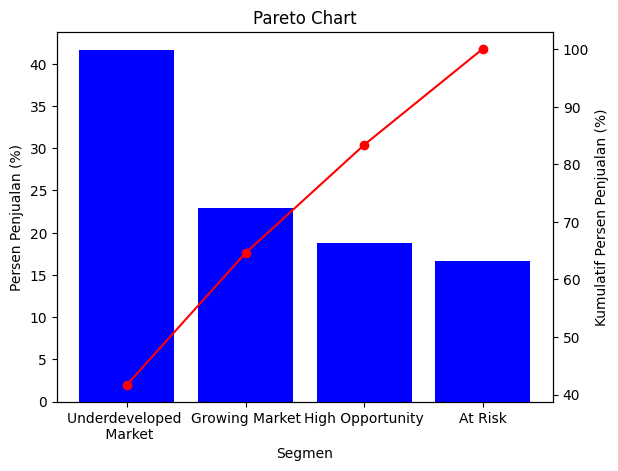

In [266]:
# Data nama segmen dan persennya
nama_segmen = ['Underdeveloped \n Market', 'Growing Market', 'High Opportunity', 'At Risk']
persen = [41.7, 22.9, 18.8, 16.7]

# Urutkan data berdasarkan persentase dari yang tertinggi ke terendah
sorted_index = sorted(range(len(persen)), key=lambda k: persen[k], reverse=True)
nama_segmen_sorted = [nama_segmen[i] for i in sorted_index]
persen_sorted = [persen[i] for i in sorted_index]

# Hitung kumulatif persentase
kumulatif_persen = [sum(persen_sorted[:i+1]) for i in range(len(persen_sorted))]

# Buat plot Pareto Chart
fig, ax1 = plt.subplots()

# Plot bar untuk persentase setiap segmen
ax1.bar(nama_segmen_sorted, persen_sorted, color='b')
ax1.set_xlabel('Segmen')
ax1.set_ylabel('Persen Penjualan (%)')

# Buat secondary y-axis untuk kumulatif persentase
ax2 = ax1.twinx()
ax2.plot(nama_segmen_sorted, kumulatif_persen, color='r', marker='o', linestyle='-')
ax2.set_ylabel('Kumulatif Persen Penjualan (%)')

# Beri judul plot
plt.title('Pareto Chart')

# Tampilkan plot
plt.show()

Dari data diatas, kategori underdeveloped market dan growing market merupakan segmen yang perlu difokuskan.  Berikut adalah apa yang bisa dilakukan berdasarkan konsep Pareto Chart:

- Underdeveloped Market (41.7%):

    - Fokuskan upaya pada pasar underdeveloped karena mereka memiliki persentase tertinggi dalam distribusi. Ini menunjukkan potensi besar untuk pertumbuhan di pasar ini.
    - Sosialisasikan nilai tambah dan potensi pengembalian investasi (ROI) yang dapat diperoleh pelanggan dengan menggunakan produk Anda.
    - Penawaran paket yang sesuai dengan anggaran pelanggan di pasar ini dapat membantu meningkatkan adopsi produk

- Growing Market (22.9%):

    - Pertahankan fokus pada pasar yang berkembang karena mereka masih menyumbang persentase yang signifikan dari penjualan SaaS. Ini menandakan peluang pertumbuhan yang masih ada di pasar ini.
    - Fokus pada pengembangan produk yang dapat meningkatkan nilai proposisi penjualan dan menarik bagi pelanggan dalam segmen ini.

Dengan fokus pada negara-negara dalam dua kategori teratas, perusahaan dapat memaksimalkan dampaknya dengan memprioritaskan upaya dan sumber daya di mana mereka akan memberikan hasil terbesar.

In [267]:
a = df_country[df_country['RFM Level']=='Underdeveloped Markets']
b = df_country[df_country['RFM Level']=='Growing Markets']
gabung = pd.concat([a,b])
gabung

,Country,Recency,Frequency,Monetary,RFM Segment,RFM Score,RFM Level
3,Belgium,44,56,17431.150,132,6,Underdeveloped Markets
7,China,33,46,23705.523,133,7,Underdeveloped Markets
9,Costa Rica,5,23,7464.930,321,6,Underdeveloped Markets
11,Czech Republic,7,21,9217.030,312,6,Underdeveloped Markets
13,Egypt,26,6,8929.370,212,5,Underdeveloped Markets
14,Finland,35,91,49095.840,133,7,Underdeveloped Markets
22,Israel,21,23,16729.102,222,6,Underdeveloped Markets
25,Luxembourg,9,44,29863.150,223,7,Underdeveloped Markets
27,Netherlands,5,25,10169.112,322,7,Underdeveloped Markets
28,New Zealand,3,22,4783.522,421,7,Underdeveloped Markets


Berikut merupakan list list negara yang memiliki RFM level Underdeveloped dan growing markets

## RFM based on products

### Defining Recency Frequency Monetary based on Products

In [282]:
# Dengan asumsi 'df_prep' adalah DataFrame Anda dengan kolom-kolom yang diperlukan


#Untuk Recency, kita perlu menemukan tanggal pembelian paling baru untuk setiap negara dan menguranginya dari tanggal referensi'
df_product_rfm = df_prep.groupby('Product').agg(
    Recency=('Order Date', lambda x: (reference_date - x.max()).days),
    Frequency=('Order ID', 'nunique'),  # count unique order IDs for frequency
    Monetary=('Sales', 'sum')  # sum sales for monetary value
).reset_index()
df_product_rfm

,Product,Recency,Frequency,Monetary
0,Alchemy,7,68,149528.0300
1,Big Ol Database,6,112,189238.6310
2,ChatBot Plugin,2,731,27118.7920
3,ContactMatcher,1,1552,410378.2650
4,Data Smasher,6,718,167380.3180
5,FinanceHub,2,886,340935.4150
6,Marketing Suite,1,224,114879.9963
7,Marketing Suite - Gold,3,777,223843.6080
8,OneView,1,451,107532.1610
9,SaaS Connector Pack,2,877,91705.1640


<Axes: xlabel='Recency', ylabel='Count'>

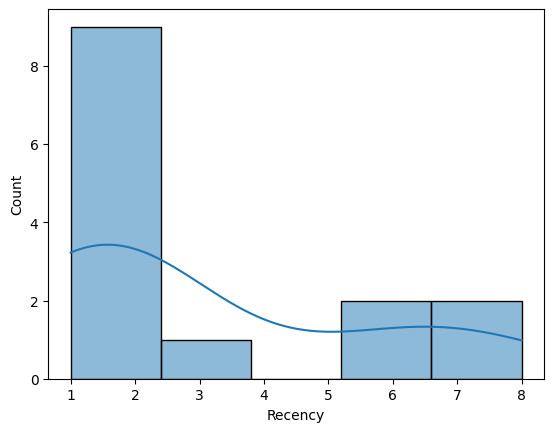

In [283]:
sns.histplot(df_product_rfm['Recency'], kde=True)

<Axes: xlabel='Frequency', ylabel='Count'>

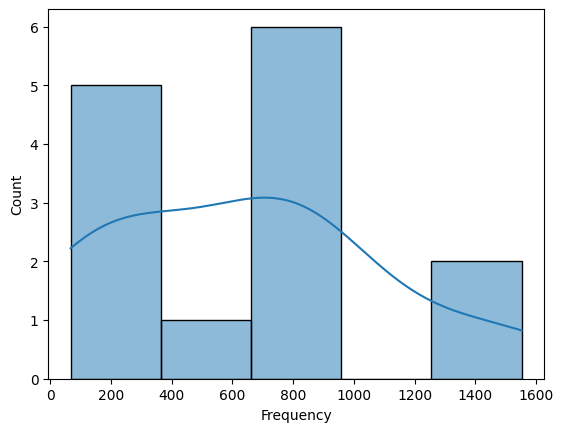

In [284]:
sns.histplot(df_product_rfm['Frequency'], kde=True)

<Axes: xlabel='Monetary', ylabel='Count'>

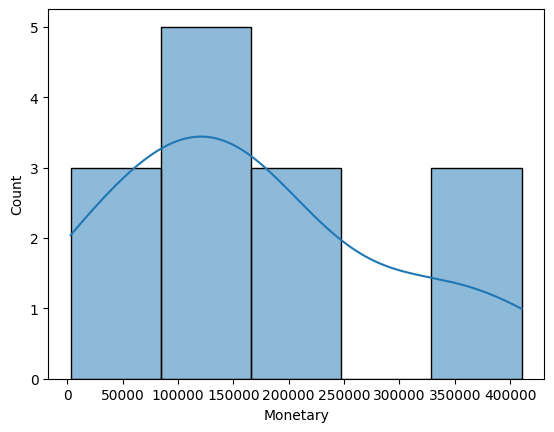

In [285]:
sns.histplot(df_product_rfm['Monetary'], kde=True)

Dapat dilihat dari histogram diatas, Recency, Frequency dan Monetary yang dilakukan oleh customer cenderung memiliki angka yang kecil. Namun, untuk interpretasi terhadap Recency, hal tersebut baik dikarenakan berarti banyak yang melakukan transaksi dekat dekat hari terakhir pada data. Namun, berbeda interpretasinya dengan frequency dan monetary, karena frequency berarti ia melakukan transaksi dengan frekuensi yang kecil, dan monetary yaitu pengeluaran money yang cenderung kecil. Lebih jelasnya mari kita segmentasi menggunakan metode RFM lebih lanjut.

Dapat dilihat dari histogram  recency diatas mayoritas produk dibeli akhir akhir ini, yang artinya merupakan hal baik karena penjualan dari produk produk tersebut dapat dibilang sukses. Untuk frequency sendiri hal ini juga cenderung baik karena banyak produk yang dibeli di angka 800an. Sedangkan untuk monetary, banyak ditransaksi di rentang 100000 sampai 150000.

### RFM based on Products segmentation

In [286]:
df_product_rfm.describe()

,Recency,Frequency,Monetary
count,14.000000,14.000000,14.000000
mean,3.071429,643.357143,164085.775736
std,2.525692,450.656036,124886.300170
min,1.000000,68.000000,3024.280000
25%,1.000000,230.250000,95661.913250
50%,2.000000,724.500000,137340.387000
75%,5.250000,861.250000,215192.363750
max,8.000000,1552.000000,410378.265000


In [287]:
def rfm_segment(baris):
    # Recency
    if baris['Recency'] <= 1:
        r_score = 4
    elif (baris['Recency'] >= 1) and (baris['Recency'] <= 2):
        r_score = 3
    elif (baris['Recency'] >= 2) and (baris['Recency'] <= 5.25):
        r_score = 2
    elif baris['Recency'] > 5.25:
        r_score = 1
    
    # Frequency
    if baris['Frequency'] <= 230.25:
        f_score = 1
    elif (baris['Frequency'] >= 230.25) and (baris['Frequency'] <= 724.5):
        f_score = 2
    elif (baris['Frequency'] >= 724.5) and (baris['Frequency'] <= 861.25):
        f_score = 3
    elif baris['Frequency'] > 861.25:
        f_score = 4

    # Frequency
    if baris['Monetary'] <= 95661.913250:
        m_score = 1
    elif (baris['Monetary'] >= 95661.913250) and (baris['Monetary'] <= 137340.387000):
        m_score = 2
    elif (baris['Monetary'] >= 137340.387000) and (baris['Monetary'] <= 215192.363750):
        m_score = 3
    elif baris['Monetary'] > 215192.363750:
        m_score = 4
    
    return str(r_score) + str(f_score) + str(m_score)


df_product_rfm['RFM Segment']= df_product_rfm.apply(rfm_segment, axis =1)
df_product_rfm

,Product,Recency,Frequency,Monetary,RFM Segment
0,Alchemy,7,68,149528.0300,113
1,Big Ol Database,6,112,189238.6310,113
2,ChatBot Plugin,2,731,27118.7920,331
3,ContactMatcher,1,1552,410378.2650,444
4,Data Smasher,6,718,167380.3180,123
5,FinanceHub,2,886,340935.4150,344
6,Marketing Suite,1,224,114879.9963,412
7,Marketing Suite - Gold,3,777,223843.6080,234
8,OneView,1,451,107532.1610,422
9,SaaS Connector Pack,2,877,91705.1640,341


Mensegmentasi RFM berdasarkan q1, q2 dan q3 dari data

In [298]:
(df_product_rfm['RFM Segment'].value_counts() / len(df_product_rfm) *100).head(20)

RFM Segment
113    14.285714
331     7.142857
444     7.142857
123     7.142857
344     7.142857
412     7.142857
234     7.142857
422     7.142857
341     7.142857
121     7.142857
434     7.142857
411     7.142857
342     7.142857
Name: count, dtype: float64

### RFM SCORE

In [289]:
def rfm_score(baris):
    # Recency
    if baris['Recency'] <= 1:
        r_score = 4
    elif (baris['Recency'] >= 1) and (baris['Recency'] <= 2):
        r_score = 3
    elif (baris['Recency'] >= 2) and (baris['Recency'] <= 5.25):
        r_score = 2
    elif baris['Recency'] > 5.25:
        r_score = 1
    
    # Frequency
    if baris['Frequency'] <= 230.25:
        f_score = 1
    elif (baris['Frequency'] >= 230.25) and (baris['Frequency'] <= 724.5):
        f_score = 2
    elif (baris['Frequency'] >= 724.5) and (baris['Frequency'] <= 861.25):
        f_score = 3
    elif baris['Frequency'] > 861.25:
        f_score = 4

    # Frequency
    if baris['Monetary'] <= 95661.913250:
        m_score = 1
    elif (baris['Monetary'] >= 95661.913250) and (baris['Monetary'] <= 137340.387000):
        m_score = 2
    elif (baris['Monetary'] >= 137340.387000) and (baris['Monetary'] <= 215192.363750):
        m_score = 3
    elif baris['Monetary'] > 215192.363750:
        m_score = 4
    
    return r_score + f_score + m_score


df_product_rfm['RFM Score']= df_product_rfm.apply(rfm_score, axis =1)
df_product_rfm

,Product,Recency,Frequency,Monetary,RFM Segment,RFM Score
0,Alchemy,7,68,149528.0300,113,5
1,Big Ol Database,6,112,189238.6310,113,5
2,ChatBot Plugin,2,731,27118.7920,331,7
3,ContactMatcher,1,1552,410378.2650,444,12
4,Data Smasher,6,718,167380.3180,123,6
5,FinanceHub,2,886,340935.4150,344,11
6,Marketing Suite,1,224,114879.9963,412,7
7,Marketing Suite - Gold,3,777,223843.6080,234,9
8,OneView,1,451,107532.1610,422,8
9,SaaS Connector Pack,2,877,91705.1640,341,8


<Axes: xlabel='RFM Score', ylabel='Count'>

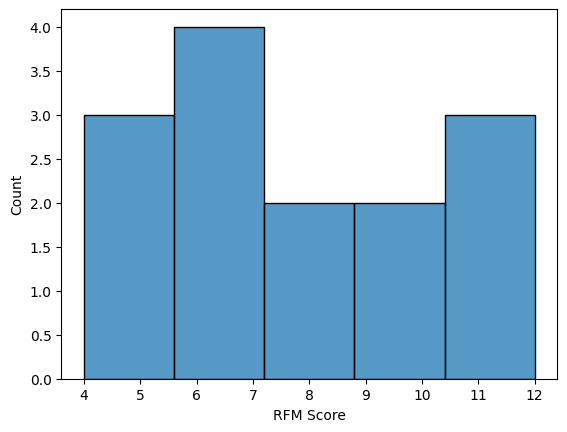

In [297]:
sns.histplot(df_product_rfm['RFM Score'])

Dapat dilihat, dari RFM Score, produk produk ini cenderung banyak di angka 6 dan 7. Dari DRFM Score ini kemungkinan akan banyak pada level yang berada di tengah.

In [291]:
def rfm_level(baris):
    if baris['RFM Score'] >= 11:
        return 'Star Products'
    elif (baris['RFM Score'] < 11) and (baris['RFM Score'] >= 8):
        return 'Cash Cows'
    elif (baris['RFM Score'] < 8) and (baris['RFM Score'] >= 5):
        return 'Question Marks'
    else:
        return 'Dog Products'


df_product_rfm['RFM Level']= df_product_rfm.apply(rfm_level, axis =1)
df_product_rfm

,Product,Recency,Frequency,Monetary,RFM Segment,RFM Score,RFM Level
0,Alchemy,7,68,149528.0300,113,5,Question Marks
1,Big Ol Database,6,112,189238.6310,113,5,Question Marks
2,ChatBot Plugin,2,731,27118.7920,331,7,Question Marks
3,ContactMatcher,1,1552,410378.2650,444,12,Star Products
4,Data Smasher,6,718,167380.3180,123,6,Question Marks
5,FinanceHub,2,886,340935.4150,344,11,Star Products
6,Marketing Suite,1,224,114879.9963,412,7,Question Marks
7,Marketing Suite - Gold,3,777,223843.6080,234,9,Cash Cows
8,OneView,1,451,107532.1610,422,8,Cash Cows
9,SaaS Connector Pack,2,877,91705.1640,341,8,Cash Cows


- Star Products: Produk yang sering dibeli dan menghasilkan pendapatan tinggi.
- Cash Cows: Produk dengan penjualan dan pendapatan tinggi tetapi tidak terjual belakangan ini, aau sebaliknya.
- Question Marks: Produk yang menunjukkan ketidakpastian, antara akhir akhir ini dibeli dengan monetary rendah, atau sebaliknya.
- Dog Products: Produk dengan nilai recency, frekuensi, dan nilai moneter yang rendah.

In [292]:
df_product_rfm['RFM Level'].value_counts()/len(df_product_rfm)*100

RFM Level
Question Marks    42.857143
Cash Cows         28.571429
Star Products     21.428571
Dog Products       7.142857
Name: count, dtype: float64

### PIE PLOTS

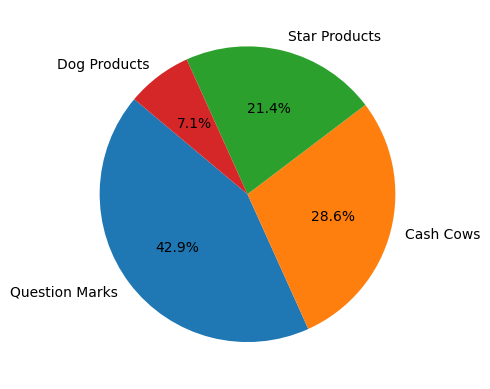

In [293]:
import matplotlib.pyplot as plt
rfm_counts = df_product_rfm['RFM Level'].value_counts()
plt.pie(rfm_counts, labels = rfm_counts.index, autopct='%1.1f%%', startangle=140)

plt.show()

Berdasarkan segmentasi, dapat dilihat bahwa question marks (42.9%) dan cash cows (28.6%) merupakan 2 segmen terbesar, mari kita lihat dengan lebih dalam menggunakan pareto chart untuk dapat memfokuskan pasarnya. 

Kegunaan Pareto Chart adalah untuk membantu pengambilan keputusan dengan mengidentifikasi dan memprioritaskan faktor-faktor yang memiliki dampak terbesar. Diagram ini didasarkan pada prinsip Pareto, yang menyatakan bahwa sebagian besar efek berasal dari sebagian kecil penyebabnya, juga dikenal sebagai prinsip 80/20.

### PARETO CHART

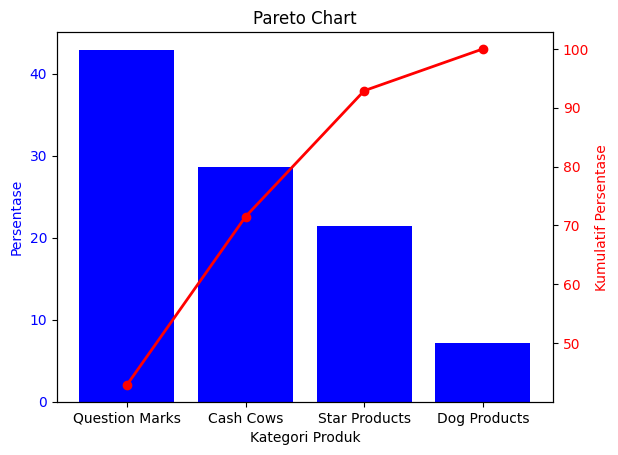

In [294]:
# Persentase dari masing-masing kategori
categories = ['Question Marks', 'Cash Cows', 'Star Products', 'Dog Products']
percentages = [42.9, 28.6, 21.4, 7.1]

# Menghitung kumulatif persentase
cumulative_percentages = [sum(percentages[:i+1]) for i in range(len(percentages))]

# Membuat Pareto chart
fig, ax1 = plt.subplots()

# Bar plot untuk persentase masing-masing kategori
ax1.bar(categories, percentages, color='b')
ax1.set_xlabel('Kategori Produk')
ax1.set_ylabel('Persentase', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Membuat secondary y-axis untuk kumulatif persentase
ax2 = ax1.twinx()
ax2.plot(categories, cumulative_percentages, color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Kumulatif Persentase', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Menambahkan judul
plt.title('Pareto Chart')

# Menampilkan plot
plt.show()

Berdasarkan distribusi persentase penjualan produk SaaS kepada pelanggan dalam kategori yang berbeda, kita dapat menerapkan konsep Pareto Chart untuk memprioritaskan strategi dan tindakan yang tepat. Berikut adalah beberapa saran berdasarkan Pareto Chart:

Fokus kepada question marks dan cash cows:
    
- Question Marks:

    - Pemasaran yang Terfokus: Tingkatkan upaya pemasaran yang terfokus untuk produk tersebut. Identifikasi audiens target yang tepat dan gunakan saluran pemasaran yang paling efektif untuk mencapai mereka.
    - Buat pesan pemasaran yang menarik dan relevan yang menyoroti manfaat dan keunggulan produk, dan mengatasi kekhawatiran atau keraguan yang mungkin dimiliki pelanggan.

- Cash Cows:
    - Pererat Customer Relationship dengan pelanggan yang sudah ada. Mintalah umpan balik dari mereka tentang produk dan layanan Anda, dan cari tahu apakah ada area di mana Anda dapat meningkatkan atau menyempurnakan produk untuk memenuhi kebutuhan mereka.
    - Tawarkan dukungan pelanggan yang luar biasa dan solusi-solusi yang inovatif untuk memastikan bahwa pelanggan tetap puas dan terlibat dengan produk Anda.
    - Strategi pemasaran baru: Pertimbangkan untuk mengubah atau memperbarui strategi pemasaran dan promosi untuk menarik kembali minat pelanggan terhadap produk ini. Misalnya, tawarkan diskon atau promosi khusus untuk mendorong pembelian ulang.
    - Pengembangan produk: Evaluasi apakah ada perubahan atau peningkatan yang dapat dilakukan pada produk untuk meningkatkan daya tariknya dan memperpanjang siklus hidup produk.

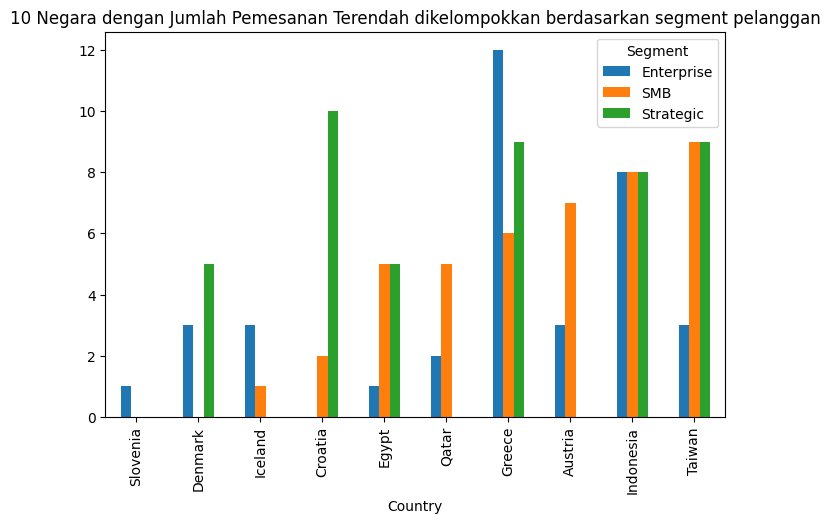

In [ ]:
df_prep2.sort_values(by=df_prep2.columns[1], ascending=True).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='10 Negara dengan Jumlah Pemesanan Terendah dikelompokkan berdasarkan segment pelanggan')
plt.show()

In [295]:
a = df_product_rfm[df_product_rfm['RFM Level']=='Question Marks']
b = df_product_rfm[df_product_rfm['RFM Level']=='Cash Cows']
gabung = pd.concat([a,b])
gabung

,Product,Recency,Frequency,Monetary,RFM Segment,RFM Score,RFM Level
0,Alchemy,7,68,149528.0300,113,5,Question Marks
1,Big Ol Database,6,112,189238.6310,113,5,Question Marks
2,ChatBot Plugin,2,731,27118.7920,331,7,Question Marks
4,Data Smasher,6,718,167380.3180,123,6,Question Marks
6,Marketing Suite,1,224,114879.9963,412,7,Question Marks
12,Storage,1,215,3024.2800,411,6,Question Marks
7,Marketing Suite - Gold,3,777,223843.6080,234,9,Cash Cows
8,OneView,1,451,107532.1610,422,8,Cash Cows
9,SaaS Connector Pack,2,877,91705.1640,341,8,Cash Cows
13,Support,2,1333,125152.7440,342,9,Cash Cows


Berikut merupakan produk produk yang memiliki RFM Level Question Marks dan Cash Cows

## Rekomendasi dan Kesimpulan

**KESIMPULAN**

Dari analisis yang telah dilakukan diatas, dapat diambil kesimpulan bahwa:
- Produk dan penetapan Discount berpengaruh terhadap profit dan Sales, namun tidak signifikan untuk quantity
- baik profit, sales, maupun quantity, semuanya memiliki hasil nilai diatas rata-rata pada discount 0% dan 20%.
- SMB merupakan segmen pasar yang paling banyak melakukan transaksi.
- Setelah dilakukan segmentasi berdasarkan negara dan analisis menggunakan pareto chart, negara dengan level RFM 'Underdeveloped Market' dan 'Growing Market' merupakan level yang perlu difokuskan dengan total persen sebesar 64,9%
- Setelah dilakukan segmentasi  berdasarkan produk dan analisis menggunakan pareto chart, negara dengan level RFM 'Question Marks' dan Cash Cows' merupakan level yang perlu difokuskan dengan total persen sebesar 71,5%

**REKOMENDASI**

1. Mengoptimalkan Strategi Harga dan Diskon:
berdasarkan hasil analisis, strategi diskon 20% dan tidak ada diskon tersebut dapat dikatakan efektif untuk meningkatkan sales maupun profit dari penjualan SaaS. Dapat dilakukan dengan dimulai menjual dengan 0% (tidak ada diskon) dan dilanjutkan dengan diskon 20% di periode yang lain.
2. Menerapkan Pendekatan Berorientasi Pelanggan:
Mengingat pentingnya SMB dalam penjualan SaaS, kembangkan strategi berorientasi pelanggan yang berfokus pada pemahaman dan pemenuhan kebutuhan khusus dari segmen ini. Hal ini mungkin termasuk menawarkan solusi yang dapat diskalakan, model harga yang fleksibel, dan dukungan pelanggan yang luar biasa.
3. Memperkuat Hubungan Pelanggan:
Buat program-program untuk memperdalam hubungan dengan pelanggan yang sudah ada, terutama dalam segmen-segmen kunci seperti SMBs. Hal ini bisa mencakup program loyalitas, lingkaran umpan balik pelanggan, dan layanan dukungan yang disesuaikan.
4. Focus on Underdeveloped markets and growing market:
prioritaskan  pasar yang termasuk pada RFM level tersebut. Hal ini cenderung mahal karena perlu melakukan riset ke berbagai negara. Jika  fokus dalam hal ini, dapat meningkatkan profit dan sales hingga 30% bahkan lebih.
5. Focus on Question mark Products and Cash Cows Products:
prioritaskan  produk produk yang termasuk pada RFM level tersebut. Hal ini cenderung lebih *financial friendly* dibandingkan dengan fokus pada market. Jika hanya fokus dalam produk, hal ini dapat meningkatkan profit dan sales hingga 35% bahkan lebih.